In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
file_id = "1DfGBgu6wTR4G4M465vMKv0F0AGYB9ZoC"
FILE_NAME = "SeoulBikeData.csv"
downloaded = drive.CreateFile({"id": file_id})
downloaded.GetContentFile(FILE_NAME)  

In [ ]:
# Simply loading the data
data = pd.read_csv(FILE_NAME)

# Exploratory data analysis

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
any(data.duplicated())

False

In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [ ]:
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (8760, 14) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


The `Seasons`, `Holiday` and `Functioning Day` columns are objects, meaning they probably contain categorical data.

In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The ranges of values in the numerical columns seem reasonable, so we may not have to do much data cleaning. The "Wind speed", "Dew point temperature(°C)",  "Solar Radiation", "Rainfall" and "Snowfall" columns seem to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

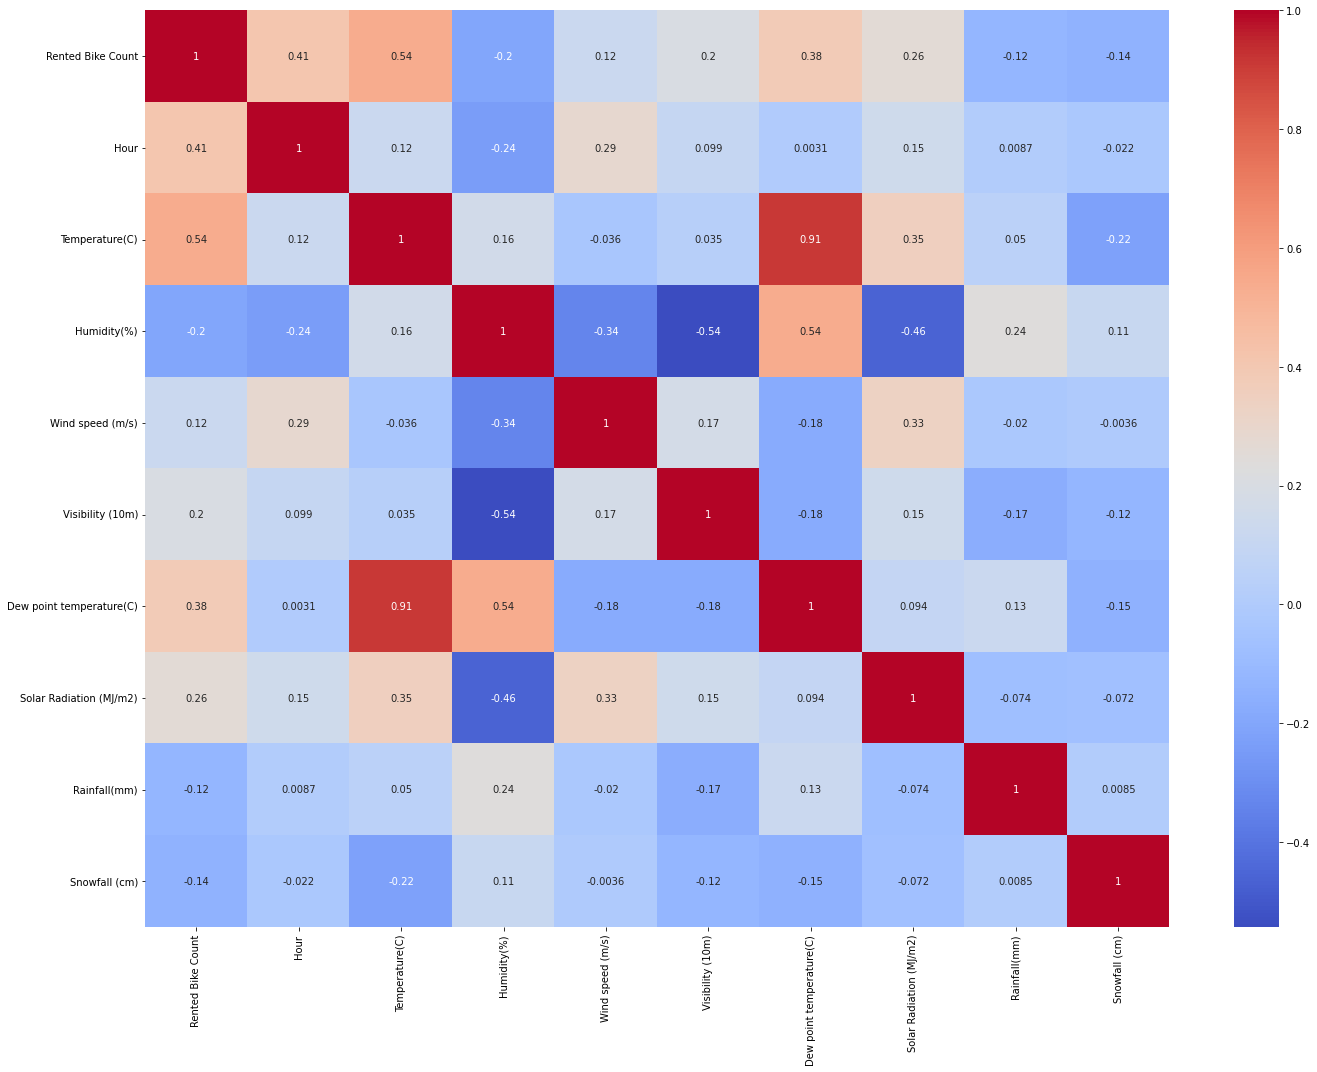

In [ ]:
plt.figure(figsize=(20, 15))
sb.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.tight_layout();

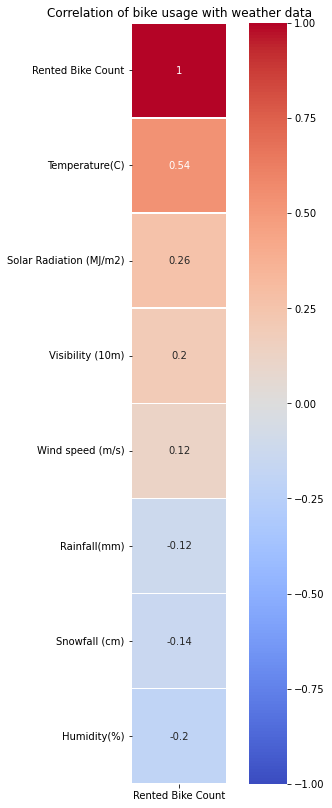

In [ ]:
plt.figure(figsize=(8, 14))
corr=data[["Temperature(C)","Wind speed (m/s)","Humidity(%)","Solar Radiation (MJ/m2)","Rainfall(mm)","Visibility (10m)","Snowfall (cm)","Rented Bike Count"]].corr()
sb.heatmap(data=corr[["Rented Bike Count"]].sort_values(by='Rented Bike Count', ascending=False), vmin=-1, vmax=1,center=0,cmap="coolwarm",annot=True,square=True,linewidths=.5)
plt.title("Correlation of bike usage with weather data")
plt.savefig("Correlation.png",dpi=300)
plt.show()

## Data cleaning

By looking at the dataset description, we can see that the Hour column is related to the timestamp. This would be easier to deal with if merged with the date and would enable time series analysis.

In [ ]:
# Date is string, so min/max are not working
print('Min: ', data.Date.min(), '\t\tMax: ', data.Date.max())
# Convert to Date but note the format is D/M/Y
data['DateTime'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
# Add the hour component
data['DateTime'] = data.apply(lambda row : row["DateTime"] + pd.DateOffset(hours = row['Hour']), axis=1)
# Now dates are correctly ordered
print('Min: ', data.DateTime.min(), '\tMax: ', data.DateTime.max())


Min:  01/01/2018 		Max:  31/12/2017
Min:  2017-12-01 00:00:00 	Max:  2018-11-30 23:00:00


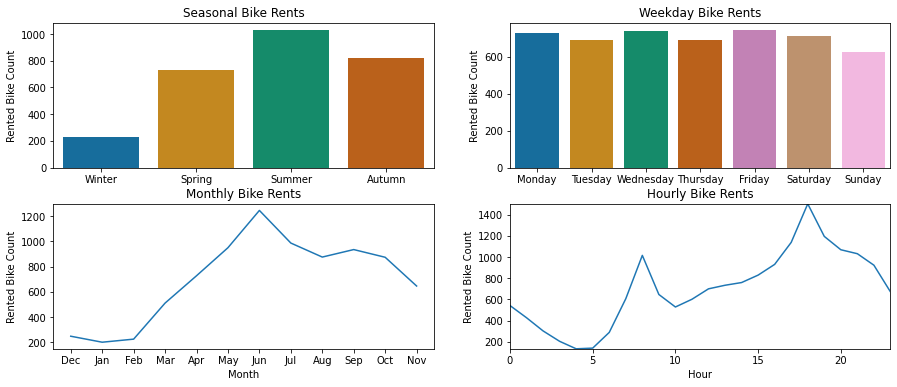

In [ ]:
data["Date"]=pd.to_datetime(data["DateTime"])
data["Month"]=data.Date.dt.month_name().str[:3]
data["Year"]=data.Date.dt.year
data["Weekday"]=data.Date.dt.weekday
data.Weekday=data.Weekday.map({0: "Monday",1: "Tuesday",2: "Wednesday" ,3: "Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
data["Weekday"] = pd.Categorical(data["Weekday"], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
data.head()
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,6), gridspec_kw={'hspace': 0.25})
sb.barplot(data=data,x="Seasons",y="Rented Bike Count",palette="colorblind",ax=ax1,ci=None)
sb.lineplot(data=data,x="Month",y="Rented Bike Count",palette="colorblind",ax=ax3,ci=None)
sb.barplot(data=data,x="Weekday",y="Rented Bike Count",palette="colorblind",ax=ax2,ci=None)
sb.lineplot(data=data,x="Hour",y="Rented Bike Count",color="tab:blue",ax=ax4,ci=None)
ax1.set_title("Seasonal Bike Rents")
ax3.set_title("Monthly Bike Rents")
ax1.set_xlabel("")
ax2.set_title("Weekday Bike Rents")
ax4.set_title("Hourly Bike Rents")
ax2.set_xlabel("")
plt.margins(x=0)
plt.margins(y=0)
plt.savefig("Timeline.png",dpi=300)
plt.show()

In [ ]:
#Set the datetime as the index
data = data.set_index("DateTime")
data = data.drop("Date", axis = 1)

Text(0, 0.5, 'Number of bikes rented')

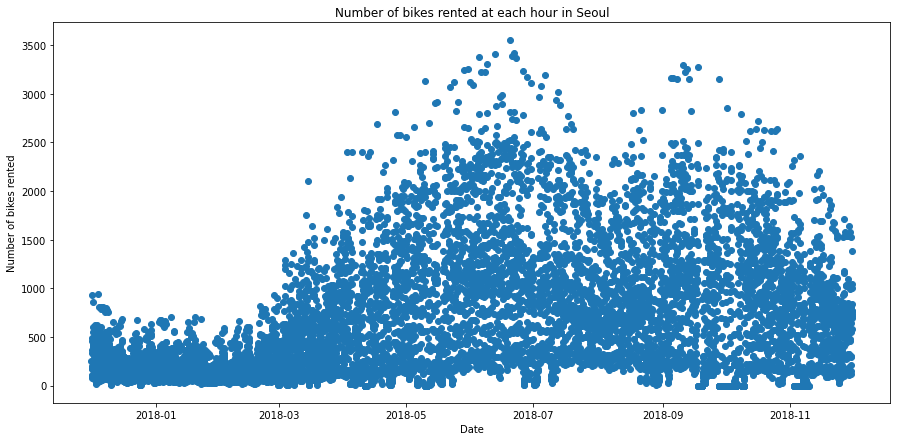

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(data.index, data["Rented Bike Count"])
plt.title("Number of bikes rented at each hour in Seoul")
plt.xlabel("Date")
plt.ylabel("Number of bikes rented")
# 2017 only includes December, 2018 includes January to November

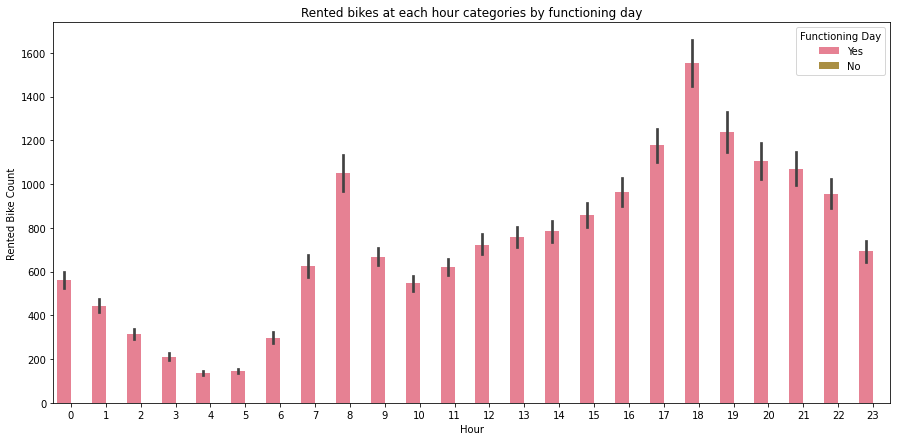

In [ ]:
# Check functioning and non functioning day, plot (Hour Vs Rented Bike Count Graph)
def barplots(x, y, hue):
    plt.figure(figsize=(15,7))
    plt.title("Rented bikes at each hour categories by functioning day")
    sb.set_palette("husl")
    sb.barplot(x=x, y=y, hue=hue, data=data);
barplots("Hour", "Rented Bike Count", "Functioning Day")
sb.set_palette("tab10");

Functioning day seems to hold no real importance to our end goal of predicting the amount of rental in a day. 

In [ ]:
data.groupby("Functioning Day")["Rented Bike Count"].value_counts()

Functioning Day  Rented Bike Count
No               0                    295
Yes              122                   19
                 223                   19
                 262                   19
                 103                   18
                                     ... 
                 3380                   1
                 3384                   1
                 3404                   1
                 3418                   1
                 3556                   1
Name: Rented Bike Count, Length: 2166, dtype: int64

In [ ]:
# Keeping rows that are functioning days. Removing rows that have no rented bikes
data = data[data["Functioning Day"] == "Yes"]
# Dropping Functioning Day columns since it has only one value.
data = data.drop("Functioning Day", axis=1)

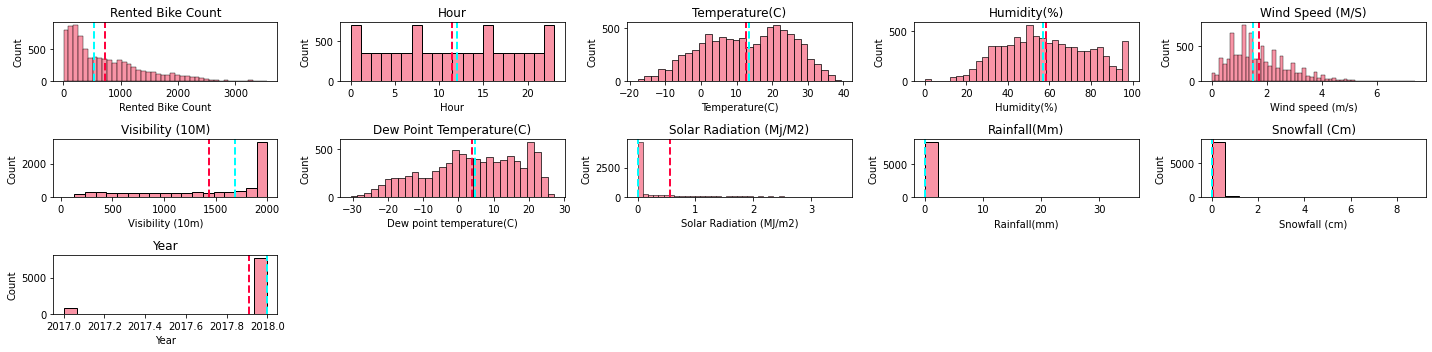

In [ ]:
# Plot num data to analyze data distribution
fig = plt.figure(figsize=(20, 5))
sb.set_palette("husl")
for index,column in enumerate(col for col in data._get_numeric_data().columns) : #([col for col in data.columns if data[col].dtype != "O"]) :
  plt.subplot(3, 5, index + 1)
  # sb.distplot(data[column]) -> Is causing some deprecation warning
  sb.histplot(data[column])
  feature = data[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color="#ff033e", linestyle="dashed", linewidth=2)  # Red indicates mean of data
  ax.axvline(feature.median(), color="#00ffff", linestyle="dashed", linewidth=2) # Cyan indicates median of data
  plt.title(f"{column.title()}")
  plt.tight_layout()
sb.set_palette("tab10");

In [ ]:
data.agg(["skew", "kurtosis"]).transpose()

,skew,kurtosis
Rented Bike Count,1.139700,0.820305
Hour,-0.001261,-1.203446
Temperature(C),-0.174550,-0.889578
Humidity(%),0.068649,-0.812228
Wind speed (m/s),0.894222,0.754256
Visibility (10m),-0.695306,-0.969125
Dew point temperature(C),-0.338775,-0.818766
Solar Radiation (MJ/m2),1.510065,1.145102
Rainfall(mm),14.616921,289.963779
Snowfall (cm),8.292830,90.542378


Right/Positive Skewed Distribution: Mode < Median < Mean: Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)

No Skew: Mean = Median = Mode : Hour, Temperature, Humidity(%),Rainfall(mm),Snowfall(cm)

Left/Negative Skewed Distribution: Mean < Median < Mode: visibility(10m)


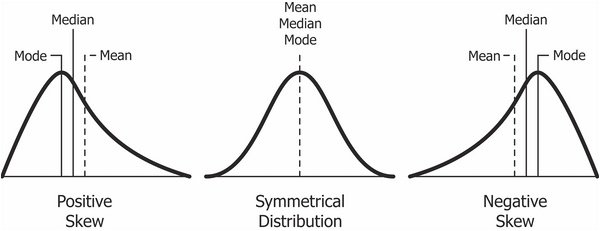

Now we can check the categorical attributes. We usually want them as numerical for easier modeling.

In [ ]:
print(data["Seasons"].value_counts())
print(data["Holiday"].value_counts())

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64
No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64


Discrete Variables Count: 3


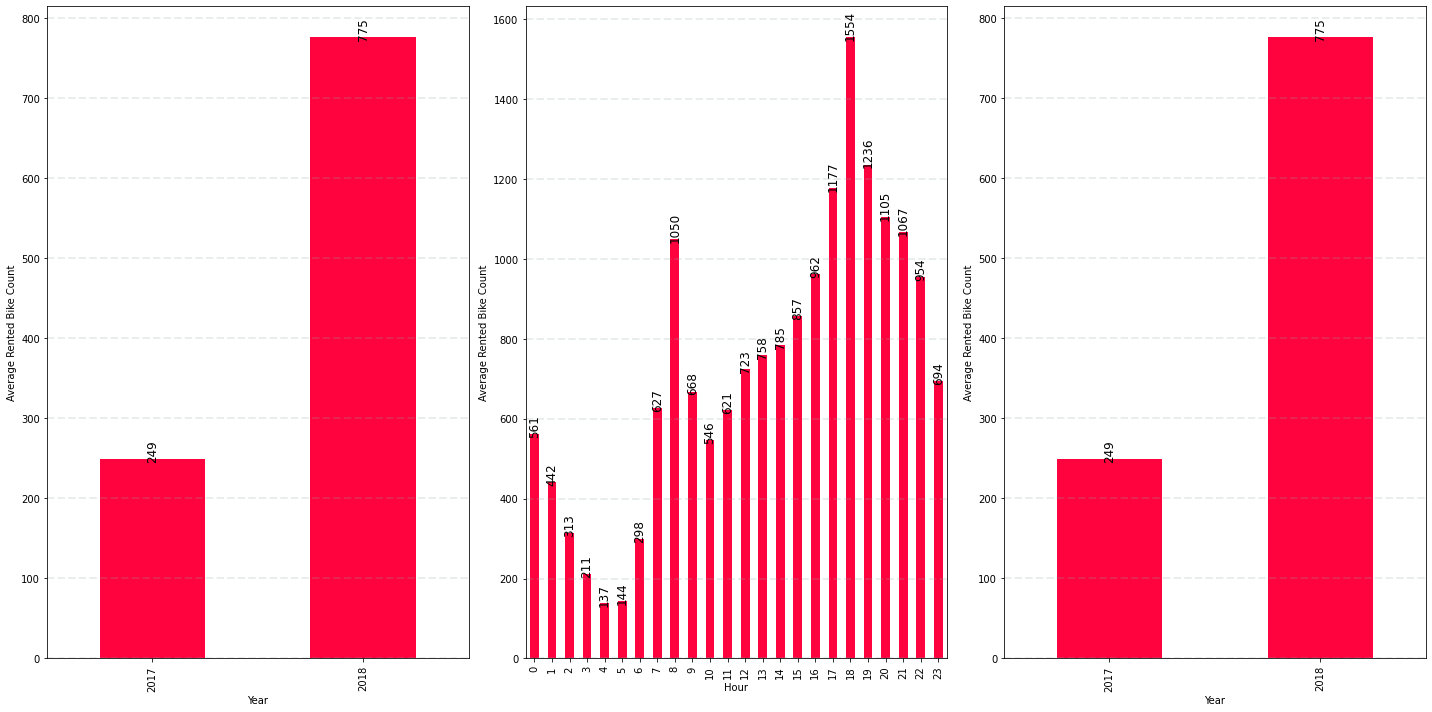

In [ ]:
# Analyze the discrete values by creating histograms to understand the distribution
num_discrete_value = [feature for feature in [col for col in data.columns if data[col].dtype != "O"] if len(data[feature].unique()) < 32]
print("Discrete Variables Count: {}".format(len(num_discrete_value)))

fig = plt.figure(figsize = (20,10))
for idx, column in enumerate(num_discrete_value) :
  plt.subplot(1, len(num_discrete_value), idx + 1)
  data.groupby(feature)["Rented Bike Count"].mean().plot(kind="bar", color="#ff033e") 
  feature = data[column]
  ax = fig.gca()
  plt.ylabel("Average Rented Bike Count")
  plt.tight_layout()
  plt.grid(color="#95a5a6", linestyle="--", linewidth=2, axis="y", alpha=0.2)
  for p in ax.patches:
      ax.annotate(round(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", size=12, rotation=90) 

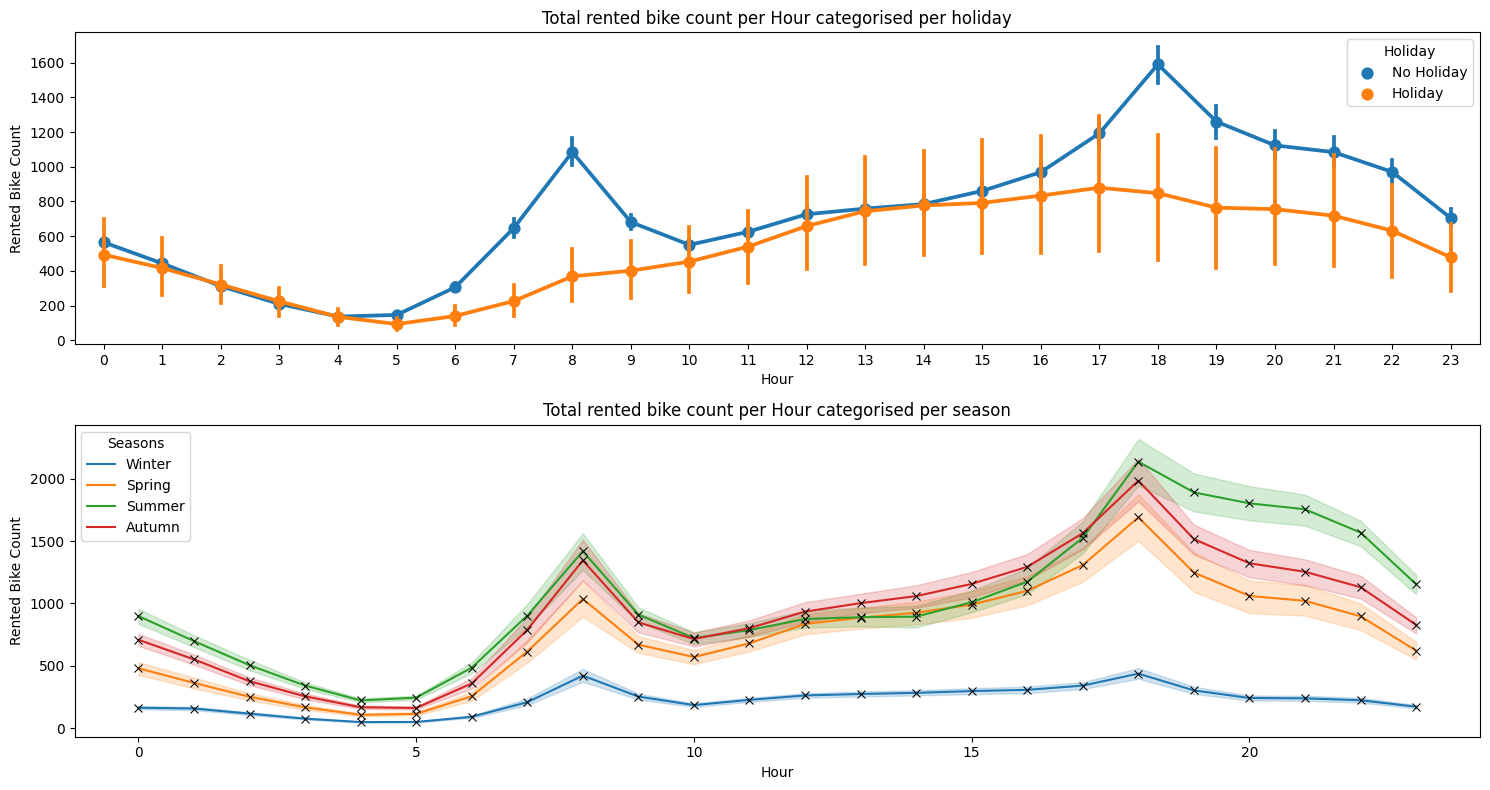

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,8), dpi=100)
sb.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[0], hue="Holiday")
sb.lineplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[1], hue="Seasons", marker="x", markeredgecolor="black")
axs[0].set_title("Total rented bike count per Hour categorised per holiday")
axs[1].set_title("Total rented bike count per Hour categorised per season")
plt.tight_layout()

The holiday column can simply be changed for a binary response.

In [ ]:
data["Holiday"] = list(map(lambda x: 0 if x == "No Holiday" else 1, data["Holiday"]))

For seasons, we'll use encoding to change strings to numerical.

In [ ]:
encoded_season_val = pd.get_dummies(data["Seasons"], prefix="Seasons")
data = pd.concat([data, encoded_season_val], axis=1)
data = data.drop("Seasons", axis=1)

A feature we can engineer is which day of the week are the bikes getting rented. It could be possible that more people rent bike on friday than monday.

In [ ]:
data["day_of_week"] = data.index.dayofweek

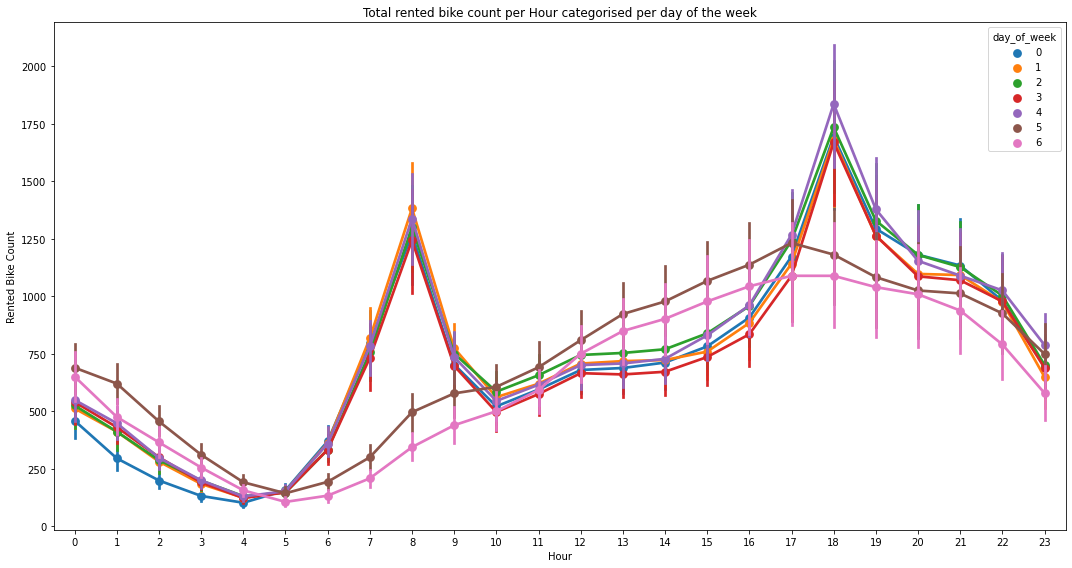

In [ ]:
# Mondays are 0 while Sundays are 6 
plt.figure(figsize=(15,8))
sb.pointplot(data=data, x="Hour", y="Rented Bike Count", hue="day_of_week", marker="x", markeredgecolor="black")
plt.title("Total rented bike count per Hour categorised per day of the week")
plt.tight_layout()

In [ ]:
encoded_day_of_week_val = pd.get_dummies(data["day_of_week"], prefix="day_of_week")
data = pd.concat([data, encoded_day_of_week_val], axis=1)
data = data.drop("day_of_week", axis=1)

In [ ]:
data["month"] = data.index.month

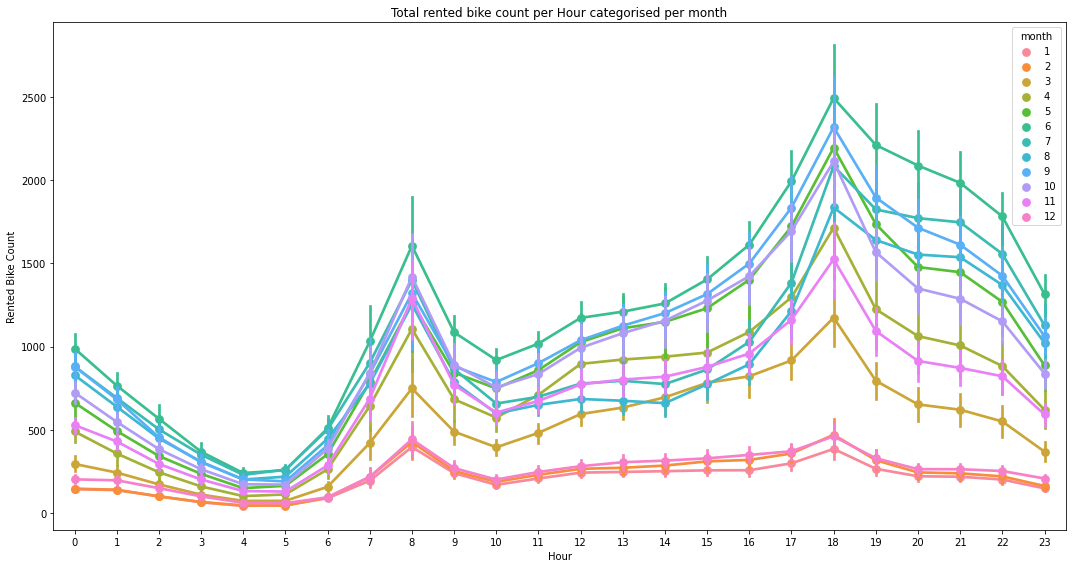

In [ ]:
plt.figure(figsize=(15,8))
sb.pointplot(data=data, x="Hour", y="Rented Bike Count", hue="month", marker="x", markeredgecolor="black")
plt.title("Total rented bike count per Hour categorised per month")
plt.tight_layout()

In [ ]:
encoded_month_val = pd.get_dummies(data["month"], prefix="month")
data = pd.concat([data, encoded_month_val], axis=1)
data = data.drop("month", axis=1)

In [ ]:
data["day"] = data.index.day
# encoded_day_val = pd.get_dummies(data["day"], prefix="day")
# data = pd.concat([data, encoded_day_val], axis=1)

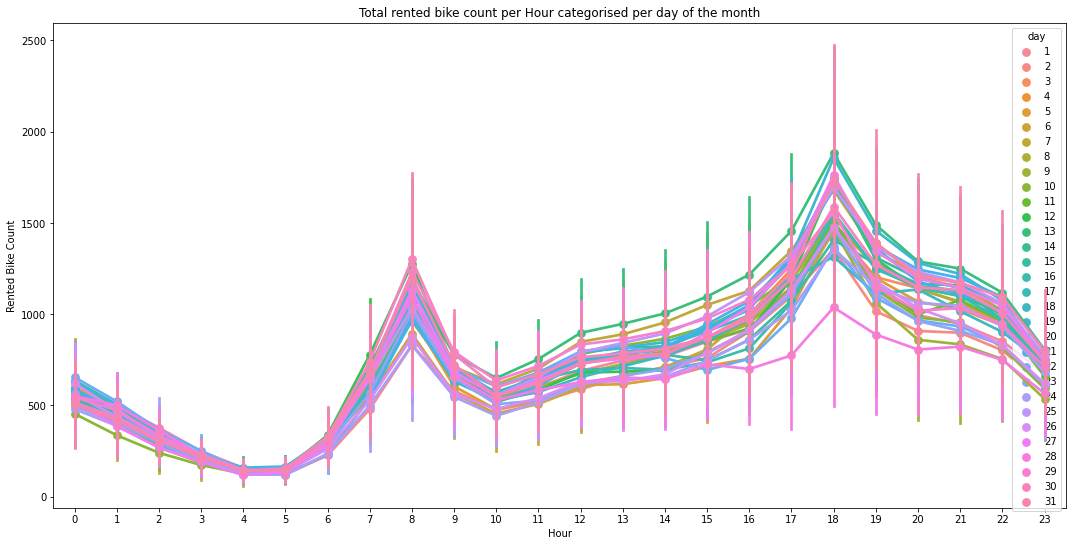

In [ ]:
plt.figure(figsize=(15,8))
sb.pointplot(data=data, x="Hour", y="Rented Bike Count", hue="day", marker="x", markeredgecolor="black")
plt.title("Total rented bike count per Hour categorised per day of the month")
plt.tight_layout()

In [ ]:
data = data.drop("day", axis=1)

In [ ]:
encoded_hour_val = pd.get_dummies(data["Hour"], prefix="Hour")
data = pd.concat([data, encoded_hour_val], axis=1)
data = data.drop("Hour", axis=1)

In [ ]:
data["is_raining"] = np.where(data["Rainfall(mm)"] == 0.0, 0, 1)
data = data.drop("Rainfall(mm)", axis=1)

In [ ]:
data["is_snowing"] = np.where(data["Snowfall (cm)"] == 0.0, 0, 1)
data = data.drop("Snowfall (cm)", axis=1)

There are three attributes that are highly correlated with temperature. We can use variance inflation factor to investigate.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_numeric_columns = data._get_numeric_data().columns[1:]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data_numeric_columns #data.columns[1:]

#vif_data
#calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(
        data.loc[:,  data_numeric_columns].to_numpy(), i #data.columns[1:]].to_numpy(), i
    )
    for i in range(len(data_numeric_columns))
]

vif_data[np.isfinite(vif_data.iloc[:, 1].values)]

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Temperature(C),100.900506
1,Humidity(%),22.077573
2,Wind speed (m/s),1.438132
3,Visibility (10m),2.346462
4,Dew point temperature(C),129.361460
5,Solar Radiation (MJ/m2),4.791432
6,Holiday,1.052355
55,is_raining,1.347073
56,is_snowing,1.289982


Dew point temperature(C) seems to be highly correlated with other attributes. This makes a lot of sense since its value is a function of temperature and humidity.

In [ ]:
data = data.drop("Dew point temperature(C)", axis=1)
data_numeric_columns = data._get_numeric_data().columns[1:]
data_numeric_columns

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data_numeric_columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(
        data.loc[:, data_numeric_columns].to_numpy(), i
    )
    for i in range(len(data_numeric_columns))
]

vif_data[np.isfinite(vif_data.iloc[:, 1].values)]

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Temperature(C),12.064145
1,Humidity(%),3.275238
2,Wind speed (m/s),1.438039
3,Visibility (10m),2.345905
4,Solar Radiation (MJ/m2),4.646074
5,Holiday,1.052346
54,is_raining,1.300435
55,is_snowing,1.285246


Numbers are down across the board, which is a good thing.

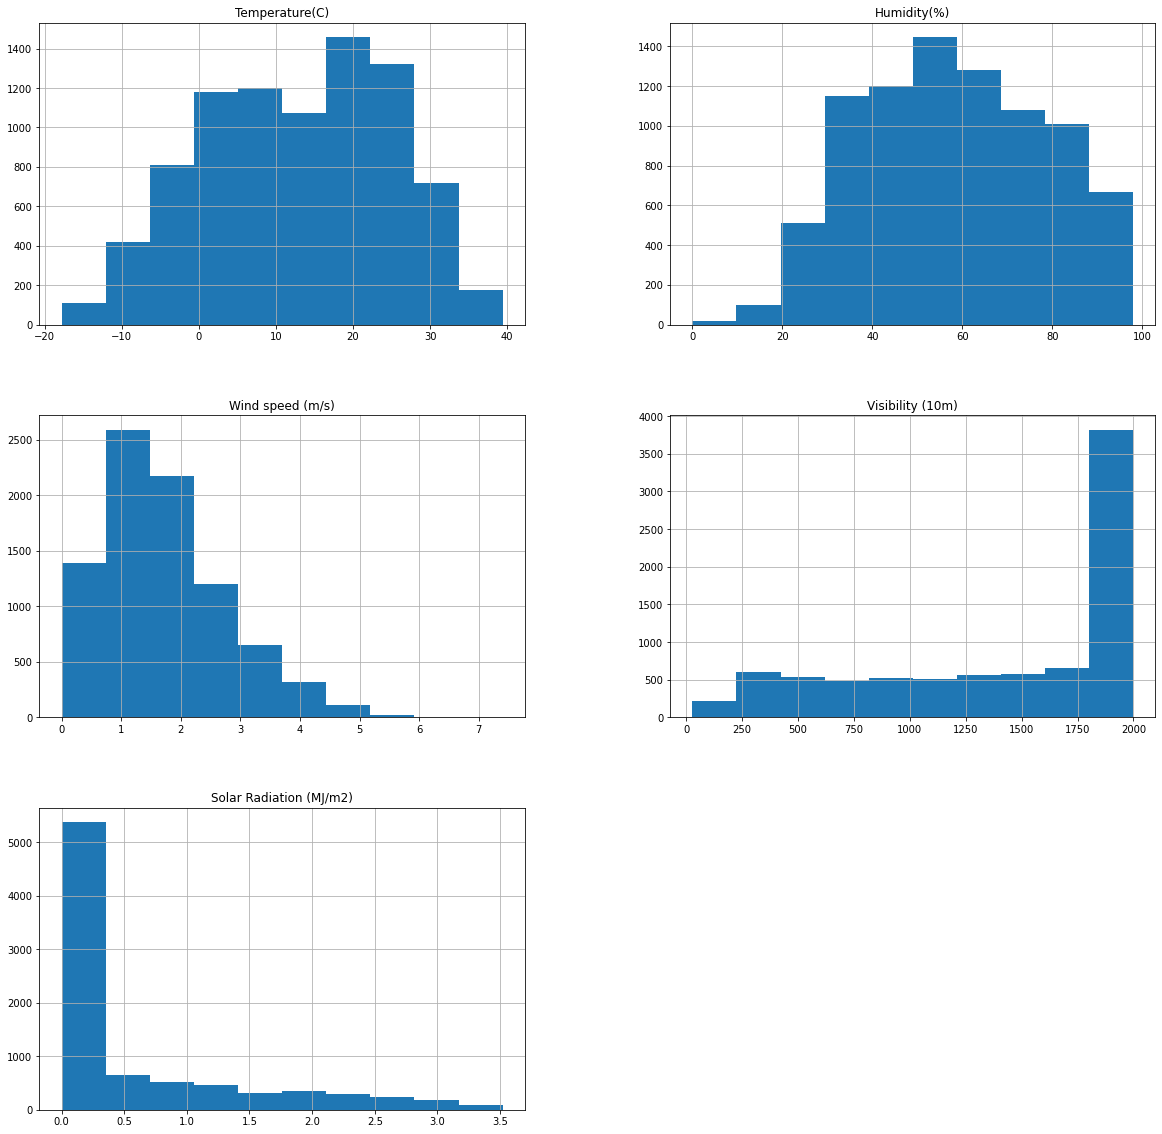

In [ ]:
numerical_attributes = [
    "Temperature(C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Solar Radiation (MJ/m2)",
    # "year_since_start",
    # "day"
]

data[numerical_attributes].hist(figsize=(20, 20));

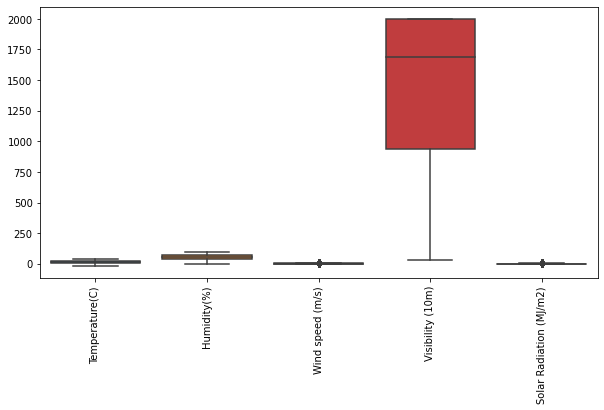

In [ ]:
# Checking for outliers
plt.figure(figsize=(10,5))   
plt.xticks(rotation=90)     
sb.boxplot(data=data[numerical_attributes])    
plt.show()

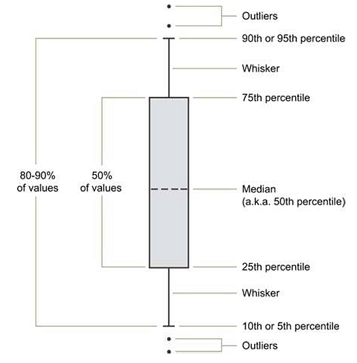

In [ ]:
# Some tricks to apply boxcox
data["Temperature(C)"] = data["Temperature(C)"] + abs(data["Temperature(C)"].min())
data[numerical_attributes] = data[numerical_attributes] + 0.0001

data[numerical_attributes] = data[numerical_attributes].apply(lambda x: stats.boxcox(x)[0], axis=0)

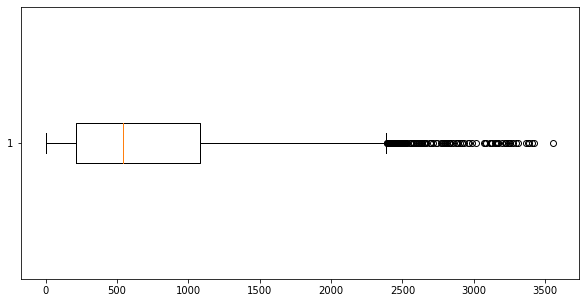

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(data["Rented Bike Count"], vert=False);

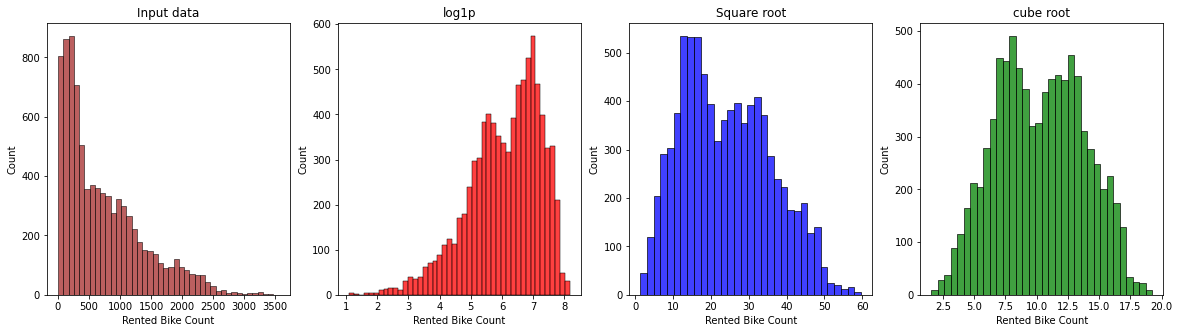

In [ ]:
# Applying diffrent tranformation techniques and checking data distributation
fig,axes = plt.subplots(1, 4, figsize=(20,5))
sb.histplot((data["Rented Bike Count"]), ax=axes[0], color="brown").set_title("Input data")
sb.histplot(np.log1p(data["Rented Bike Count"] + 0.0000001), ax=axes[1], color="red").set_title("log1p") # Transform only posible in positive value and >0 value so add 0.0000001 in data
sb.histplot(np.sqrt(data["Rented Bike Count"]),ax=axes[2], color="blue").set_title("Square root")
sb.histplot(np.cbrt(data["Rented Bike Count"]*2),ax=axes[3], color="green").set_title("cube root");

In [ ]:
def plotvariable(df, variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1, 2, 1)   
  df[variable].hist(bins=30)

  #QQ plot
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt);

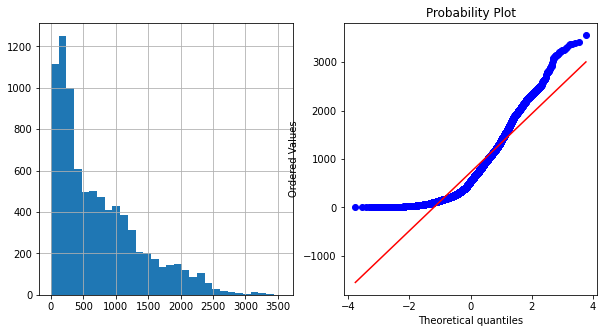

In [ ]:
plotvariable(data, "Rented Bike Count")

Our Rented Bike Count target is not normally distributed. We need to make some transformations before attempting to model. 

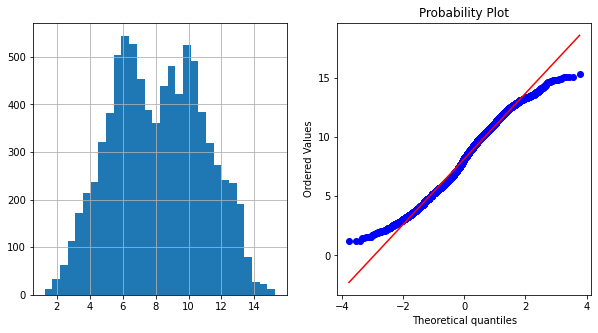

In [ ]:
data["RBC_qb"] = np.cbrt(data["Rented Bike Count"]) # Try cube root technique to convert positive skewed to normal distributation

plotvariable(data, "RBC_qb")

Text(0.5, 0, 'Rented Bike count (cube root)')

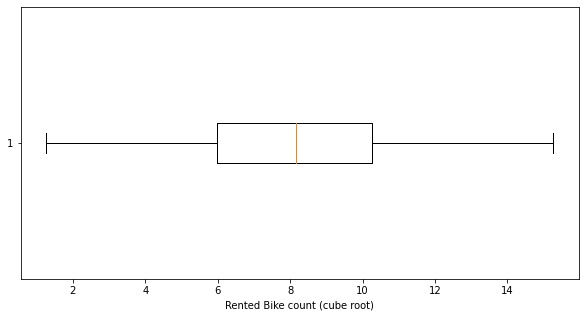

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(data["RBC_qb"], vert=False);
plt.xlabel("Rented Bike count (cube root)")

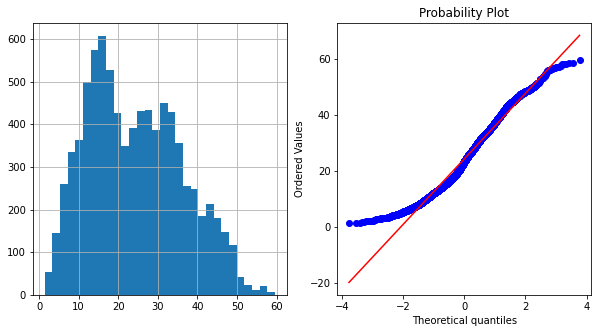

In [ ]:
data["RBC_sqrt"] = np.sqrt(data["Rented Bike Count"])

plotvariable(data, "RBC_sqrt")

Text(0.5, 0, 'Rented Bike count (square root)')

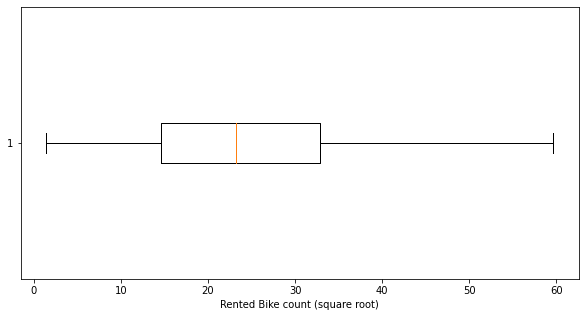

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(data["RBC_sqrt"], vert=False);
plt.xlabel("Rented Bike count (square root)")

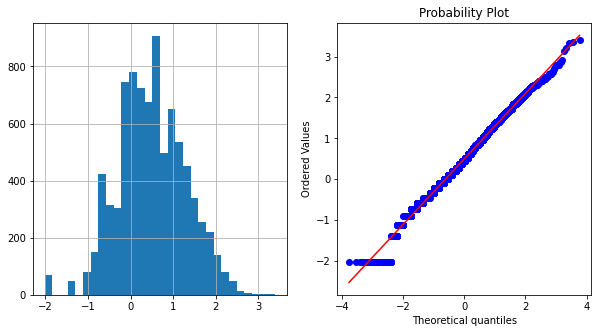

In [ ]:
plotvariable(data, "Wind speed (m/s)")

In [ ]:
# Deleting the RBC_qb and RBC_sqrt columns since it leaks the y column labels
data = data.drop("RBC_qb", axis=1)
data = data.drop("RBC_sqrt", axis=1)

# Modeling

In [ ]:
X = data.iloc[:, ~data.columns.isin(["Rented Bike Count", "Month", "Weekday"])]
Y = data.loc[:, "Rented Bike Count"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Check the shape of the train and test dataset
print(f"The shape of the train and test set for the independent variables are: X_train = {X_train.shape}, X_test = {X_test.shape}")
print(f"The shape of the train and test set for the dependent variables are: y_train = {y_train.shape}, y_test = {y_test.shape}")

The shape of the train and test set for the independent variables are: X_train = (6772, 56), X_test = (1693, 56)
The shape of the train and test set for the dependent variables are: y_train = (6772,), y_test = (1693,)


In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

# Accuracy checking using Scaler
def predict(ml_model, X, y, scaler_type):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    
    if scaler_type == "robust": 
      scal = RobustScaler()
    elif scaler_type == "standard":
      scal = StandardScaler()
    elif scaler_type == "minmax":
      scal = MinMaxScaler()
    else:
      raise ValueError("Invalid scaler type")

    X_train = scal.fit_transform(X_train)
    X_test = scal.transform(X_test)

    model = ml_model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.figure(figsize=(15, 7))
    plt.scatter(y_pred, y_test, color="b")
    plt.plot(y_test, y_test, color="r")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    print(
      f"R^2 is {model.score(X_test, y_test)}\n" + 
      f"Adj R^2 is {1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)}\n" + 
      f"RMSE is: {mean_squared_error(y_test, y_pred, squared=False)}"
    )
    
    return y_pred

## Linear regression

R^2 is 0.8179257119247423
Adj R^2 is 0.8116933402057849
RMSE is: 1.2136983805576282
R^2 is 0.8179894003103985
Adj R^2 is 0.8117592086339818
RMSE is: 1.2134860901454112
R^2 is 0.8179893530216827
Adj R^2 is 0.8117591597265814
RMSE is: 1.2134862477851176


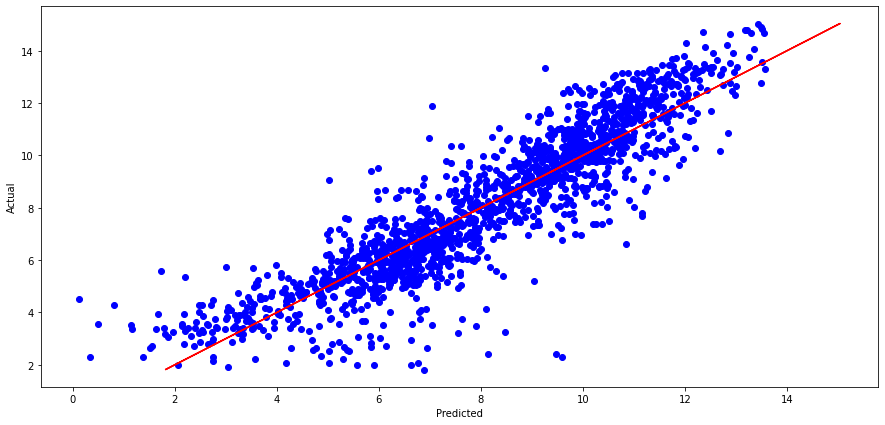

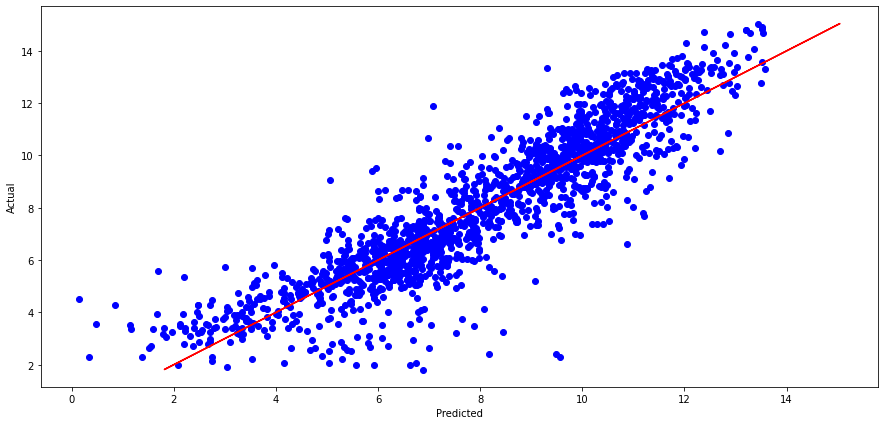

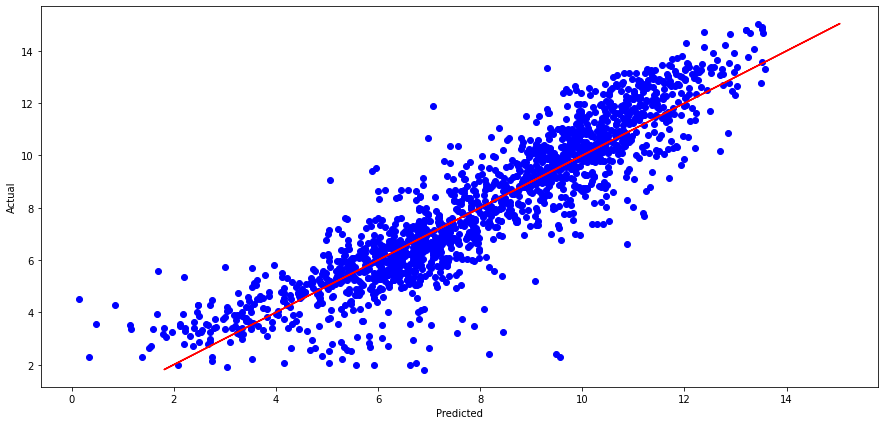

In [ ]:
from sklearn.linear_model import LinearRegression

X_lr = X.copy()
Y_lr = Y.copy()
Y_lr = np.cbrt(Y_lr)

# Predict linear regression
pred = predict(LinearRegression(), X_lr, Y_lr, "standard")
pred = predict(LinearRegression(), X_lr, Y_lr, "minmax")
pred = predict(LinearRegression(), X_lr, Y_lr, "robust")

0.7913592575697577


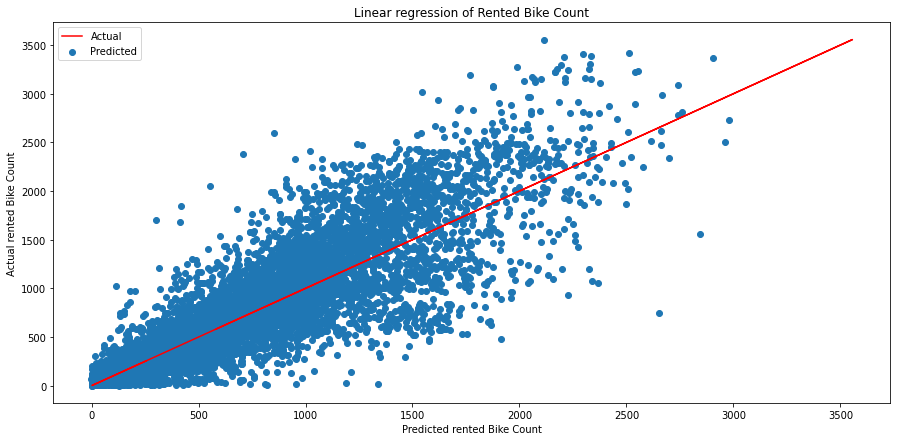

In [ ]:
X_lr_scaled = StandardScaler().fit_transform(X_lr)

model = LinearRegression().fit(X_lr_scaled, Y_lr)
# Back-transformed coefficients
y_pred = (model.intercept_ + (X_lr_scaled @ model.coef_)) ** 3

print(model.score(X_lr_scaled, Y_lr))

plt.figure(figsize=(15, 7))
plt.scatter(y_pred, Y, label="Predicted")
plt.plot(Y, Y, color="red", label="Actual")
plt.title("Linear regression of Rented Bike Count")
plt.ylabel("Actual rented Bike Count")
plt.xlabel("Predicted rented Bike Count")
plt.legend();

In [ ]:
[print(f"{key}: {val}\n") for key, val in zip(X_lr.columns, model.coef_)];

Temperature(C): 1.2473457678033337

Humidity(%): -0.4002200937558308

Wind speed (m/s): -0.05293638707952239

Visibility (10m): 0.08271180080682652

Solar Radiation (MJ/m2): 0.6874171543407805

Holiday: -0.14967976801501642

Year: 3128387737225.1904

Seasons_Autumn: 19337626600747.812

Seasons_Spring: 31775620237978.14

Seasons_Summer: 4678471752263.636

Seasons_Winter: 20262276386464.492

day_of_week_0: -13120368193029.229

day_of_week_1: -12689204706474.727

day_of_week_2: -12908292851183.318

day_of_week_3: -12908292851183.355

day_of_week_4: -13015185431211.64

day_of_week_5: -12984186915858.328

day_of_week_6: -13015185431211.902

month_1: -7855643002508.809

month_2: -7500590741530.708

month_3: -15333123659179.898

month_4: -14876287902994.615

month_5: -15107213034738.193

month_6: 2253453173406.289

month_7: 2287150918475.3457

month_8: 2287150918475.25

month_9: -7133905151455.913

month_10: -7345264397631.548

month_11: -7258666915719.632

month_12: -4727255265283.467

Hour_

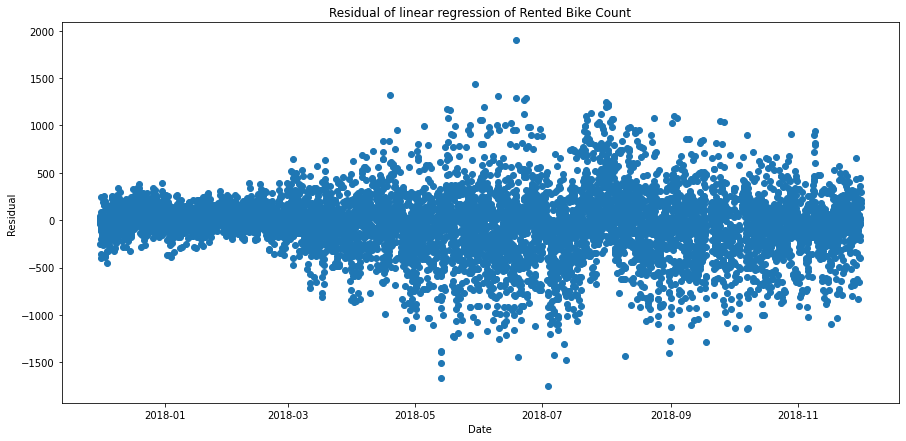

In [ ]:
X_lr["residuals"] = y_pred - Y
plt.figure(figsize=(15, 7))
plt.scatter(Y.index, X_lr["residuals"])
plt.title("Residual of linear regression of Rented Bike Count")
plt.ylabel("Residual")
plt.xlabel("Date");

The noise does not seems to be correlated and the variance stays about the same which are a good sign.

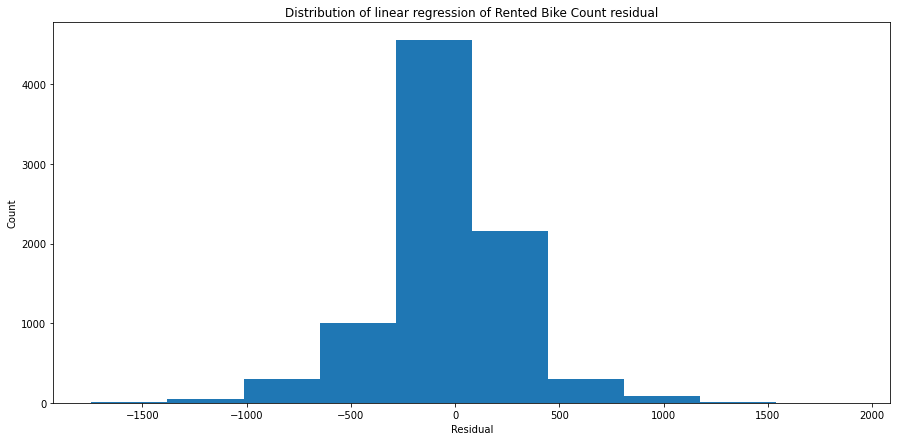

In [ ]:
plt.figure(figsize=(15, 7))
plt.hist(X_lr["residuals"])
plt.title("Distribution of linear regression of Rented Bike Count residual")
plt.ylabel("Count")
plt.xlabel("Residual");

The distribution of the residuals is normal.

Combining into one plot:

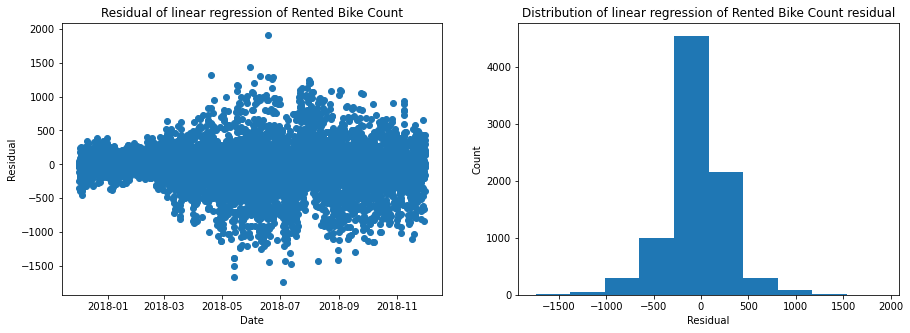

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(Y.index, X_lr["residuals"])
plt.title("Residual of linear regression of Rented Bike Count")
plt.ylabel("Residual")
plt.xlabel("Date")
plt.subplot(1,2,2)
plt.hist(X_lr["residuals"])
plt.title("Distribution of linear regression of Rented Bike Count residual")
plt.ylabel("Count")
plt.xlabel("Residual")
plt.show()

## Decision Tree

R^2 is 0.7866865456599581
Adj R^2 is 0.7793848626263136
RMSE is: 303.6943012114399
R^2 is 0.7960643155530389
Adj R^2 is 0.7890836319778373
RMSE is: 296.9437102225876
R^2 is 0.7917970021241724
Adj R^2 is 0.7846702491406476
RMSE is: 300.03436995478404


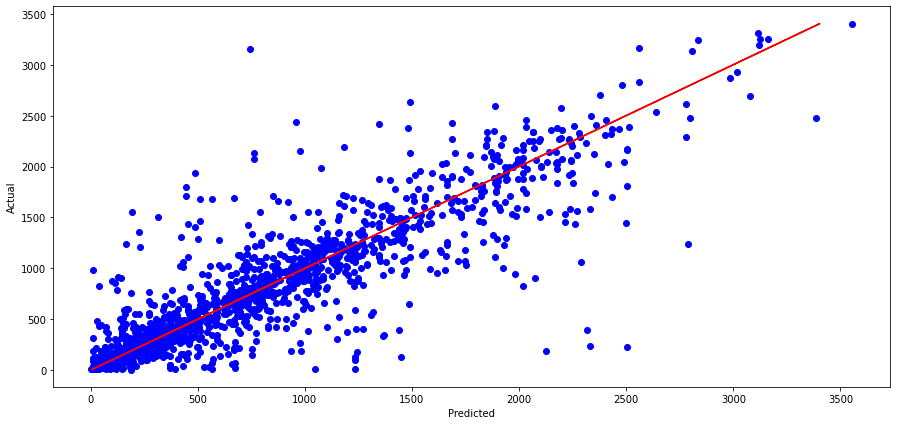

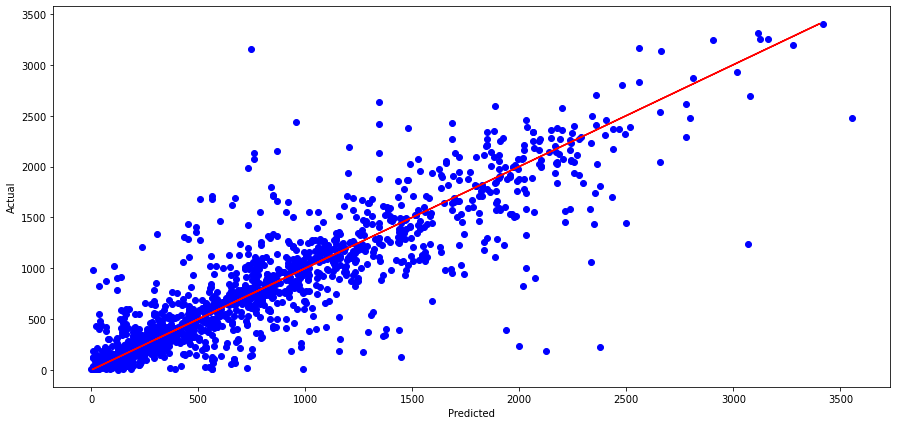

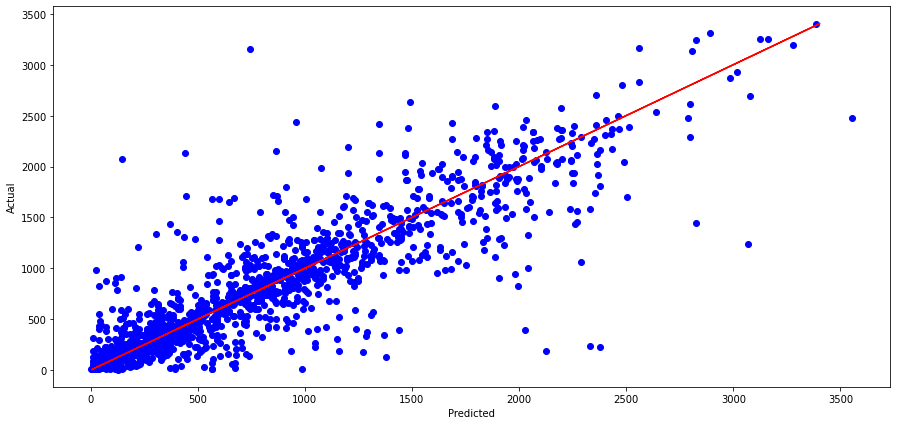

In [ ]:
from sklearn.tree import DecisionTreeRegressor

pred = predict(DecisionTreeRegressor(), X, Y, "standard")
pred = predict(DecisionTreeRegressor(), X, Y, "minmax")
pred = predict(DecisionTreeRegressor(), X, Y, "robust")

## Random Forest

R^2 is 0.9024689296799724
Adj R^2 is 0.899130457835277
RMSE is: 205.35203610734365
R^2 is 0.9038400858442228
Adj R^2 is 0.9005485484403576
RMSE is: 203.90343951882664
R^2 is 0.9023425538665455
Adj R^2 is 0.8989997561993857
RMSE is: 205.48503541356283


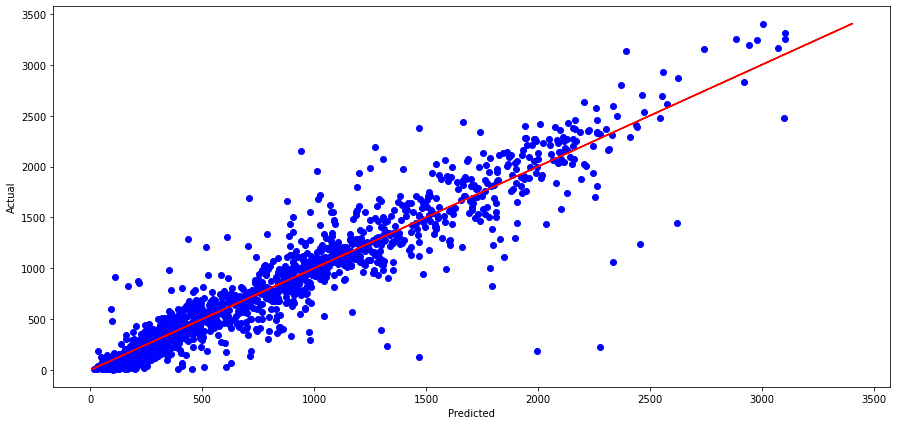

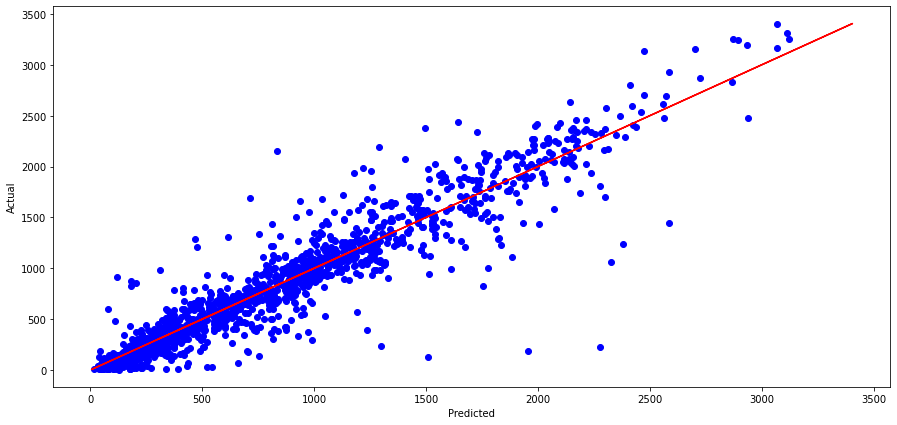

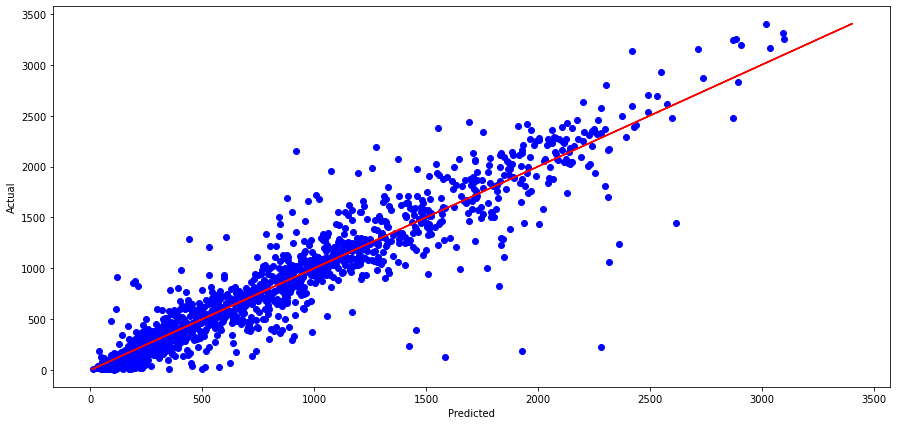

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pred = predict(RandomForestRegressor(), X, Y, "standard")
pred = predict(RandomForestRegressor(), X, Y, "minmax")
pred = predict(RandomForestRegressor(), X, Y, "robust")

## Light Gradient Boosting Model 

R^2 is 0.9317204803218178
Adj R^2 is 0.9293832840492149
RMSE is: 171.81961710082425
R^2 is 0.9333174313021467
Adj R^2 is 0.9310348983882838
RMSE is: 169.79843328577394
R^2 is 0.9306730651294808
Adj R^2 is 0.9283000160141085
RMSE is: 173.13246717154817


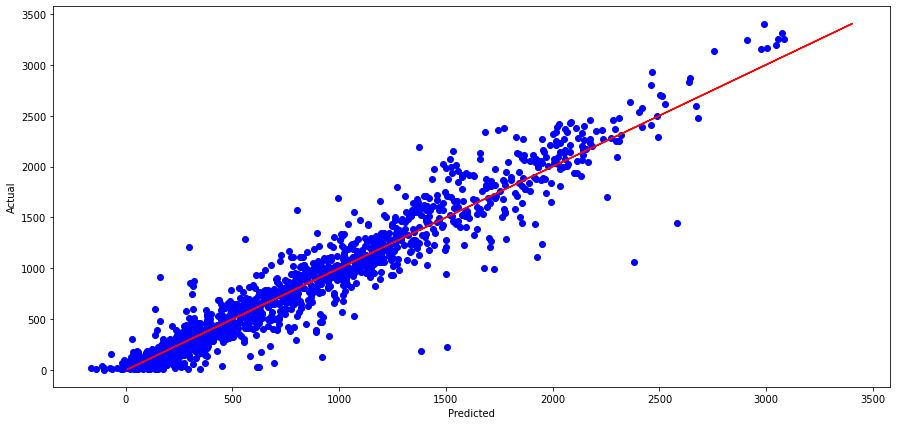

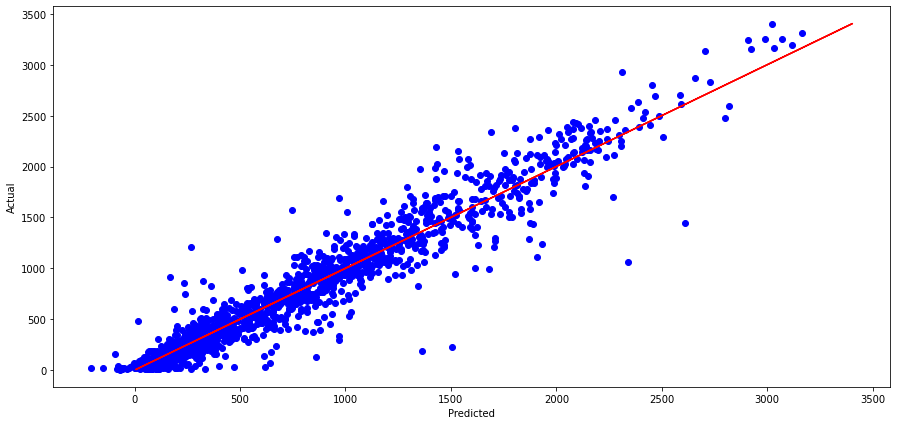

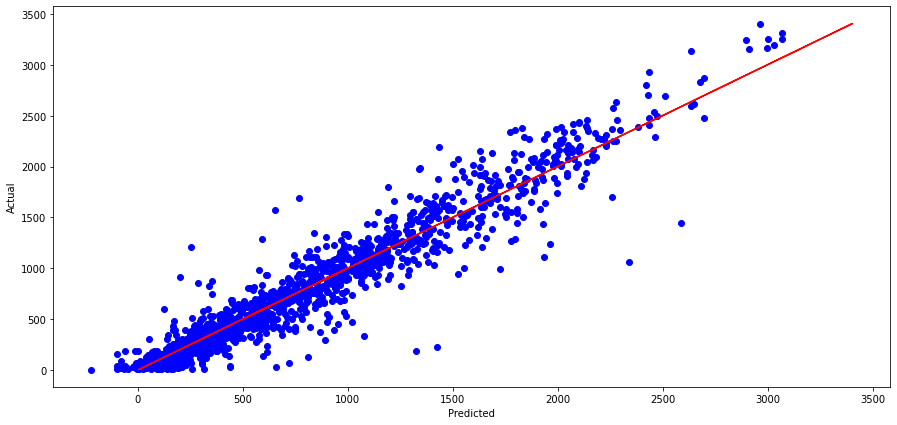

In [ ]:
from lightgbm import LGBMRegressor

pred = predict(LGBMRegressor(), X, Y, "standard")
pred = predict(LGBMRegressor(), X, Y, "minmax")
pred = predict(LGBMRegressor(), X, Y, "robust")

A reoccuring pattern happening is the way the StandardScaler object always yield better results. So for the remaining of the notebook, we will only use this.

## Finding the best model

In order to find the best model, we need a way 

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

models = [
  ["LinearRegression: ",          LinearRegression()],
  ["Lasso: ",                     Lasso()],
  ["Ridge: ",                     Ridge()],
  ["KNeighborsRegressor: ",       KNeighborsRegressor()],
  ["SVR: " ,                      SVR(kernel="linear")],
  ["DecisionTree: ",              DecisionTreeRegressor(random_state=42)],
  ["RandomForest: ",              RandomForestRegressor(random_state=42)],
  ["ExtraTreeRegressor: ",        ExtraTreesRegressor(random_state=42)],
  ["GradientBoostingRegressor: ", GradientBoostingRegressor(random_state=42)],
  ["XGBRegressor: ",              xgb.XGBRegressor(random_state=42)] ,
  ["Light-GBM: ",                 LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42)],
  ["MLPRegressor: ",              MLPRegressor(activation="relu", solver="adam", learning_rate="adaptive", max_iter=1000, learning_rate_init=0.01, alpha=0.01)]
]

In [ ]:
import time
import math

from sklearn.metrics import r2_score

scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

model_data = []
for name, curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train, y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train, curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test, curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = math.sqrt(mean_squared_error(y_test, curr_model.predict(X_test)))
    model_data.append(curr_model_data)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.483e+05, tolerance: 2.828e+05
  model = cd_fast.enet_coordinate_descent(


[18:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Compare model accuracy
df_all_model = pd.DataFrame(model_data)
df_all_model

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,0.027365,0.736122,0.725099,328.515554
1,Lasso:,0.544091,0.735851,0.725489,328.282406
2,Ridge:,0.008305,0.736125,0.725153,328.483100
3,KNeighborsRegressor:,0.001130,0.859623,0.782278,292.360512
4,SVR:,5.110909,0.716524,0.710890,336.898333
5,DecisionTree:,0.076665,1.000000,0.818326,267.063433
6,RandomForest:,4.977820,0.987443,0.895800,202.255804
7,ExtraTreeRegressor:,4.214468,1.000000,0.915154,182.508684
8,GradientBoostingRegressor:,1.173287,0.860744,0.836236,253.557735
9,XGBRegressor:,1.118965,0.857113,0.832953,256.086664


Above Train and Test R2 Score show this is a good model.

A score near 1 is very good model.

So, In above results best models are :

RandomForest: 89%

ExtraTreeRegressor: 91%

GradientBoostingRegressor: 83%

XGBRegressor: 83%

Light-GBM: 92%

In [ ]:
# Apply LGBMRegressor to try and improve model accuracy 
# Here we are using the same parameters as random forest, aprat from the addition of one that is the learning_rate.
gbr = LGBMRegressor()
gbr_params = {
    "n_estimators":[100, 1000, 5000],
    "max_depth":[2, 20, -1], #-1 here means no max depth
    "learning_rate":[0.01, 0.05, 0.1, 0.3],
    "loss": ["ls", "huber", "quantile"],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

regressor = GridSearchCV(gbr, gbr_params, verbose=1, cv=3, n_jobs=-1) 
regressor.fit(X_train, y_train) 

# It takes around 15-25min -- apologies in advance, go take a break! 

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'loss': ['ls', 'huber', 'quantile'],
                         'max_depth': [2, 20, -1],
                         'n_estimators': [100, 1000, 5000]},
             verbose=1)

In [ ]:
regressor.best_params_ # View selected best parameter by model

{'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 20, 'n_estimators': 5000}

In [ ]:
regressor.best_estimator_     

LGBMRegressor(learning_rate=0.01, loss='ls', max_depth=20, n_estimators=5000)

In [ ]:
predictions = regressor.predict(X_test) 

In [ ]:
from sklearn.metrics import mean_absolute_error

print("Root Mean Squared Error is {:.4f}".format(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))))

Root Mean Squared Error is 171.0048


In [ ]:
# Now to apply best selected paramter and check results
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

# Standardize the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Hyperparameters for GradientBoostingRegressor
gbr_params = {"n_estimators": 5000,
          "max_depth": 20,
          "min_samples_split": 10,
          "learning_rate": 0.01,
          "loss": "ls"}

# Create an instance of gradient boosting regressor
gbr = LGBMRegressor(**gbr_params)

# Fit the model
gbr.fit(X_train_std, y_train)

# Print Coefficient of determination R^2
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Root Mean Squared Error is {:.4f}".format(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))))



Model Accuracy: 0.926
The mean squared error (MSE) on test set: 29242.6250
Root Mean Squared Error is 781.9840


In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# step-1: create a cross-validation scheme
folds = KFold(n_splits=5, shuffle=True, random_state=100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{"n_features_to_select": list(range(1, 14))}]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# step-3: perform grid search
# Create an instance of gradient boosting regressor
gbr = LGBMRegressor()

# Fit the model
gbr.fit(X_train_std, y_train)
rfe = RFE(gbr)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator=rfe, param_grid=hyper_params, scoring="r2", cv=folds,  verbose=1, return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LGBMRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
model_cv.best_params_ 

{'n_features_to_select': 13}

In [ ]:
model_cv.best_estimator_ 

RFE(estimator=LGBMRegressor(), n_features_to_select=13)

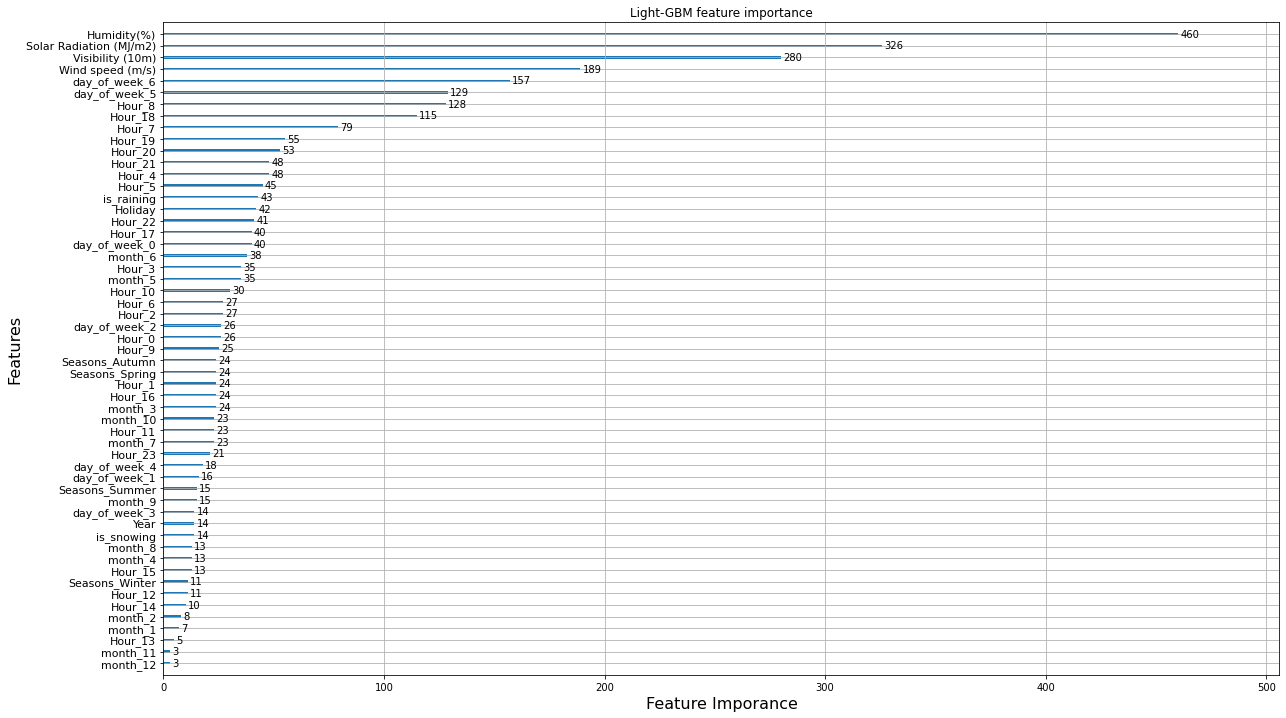

In [ ]:
# Plot decision tree
from lightgbm import plot_importance, create_tree_digraph
feature_imp = pd.DataFrame({"Value": gbr.feature_importances_, "Feature": X_train.columns}).sort_values(by="Value", ascending=False)
axs = plot_importance(gbr, title="Light-GBM feature importance", figsize=(20, 12)).set_yticklabels(feature_imp["Feature"].to_numpy()[::-1],fontsize=11)
plt.xlabel("Feature Imporance", fontsize=16)
plt.ylabel("Features",fontsize=16)
plt.margins(x=0)
plt.margins(y=0)

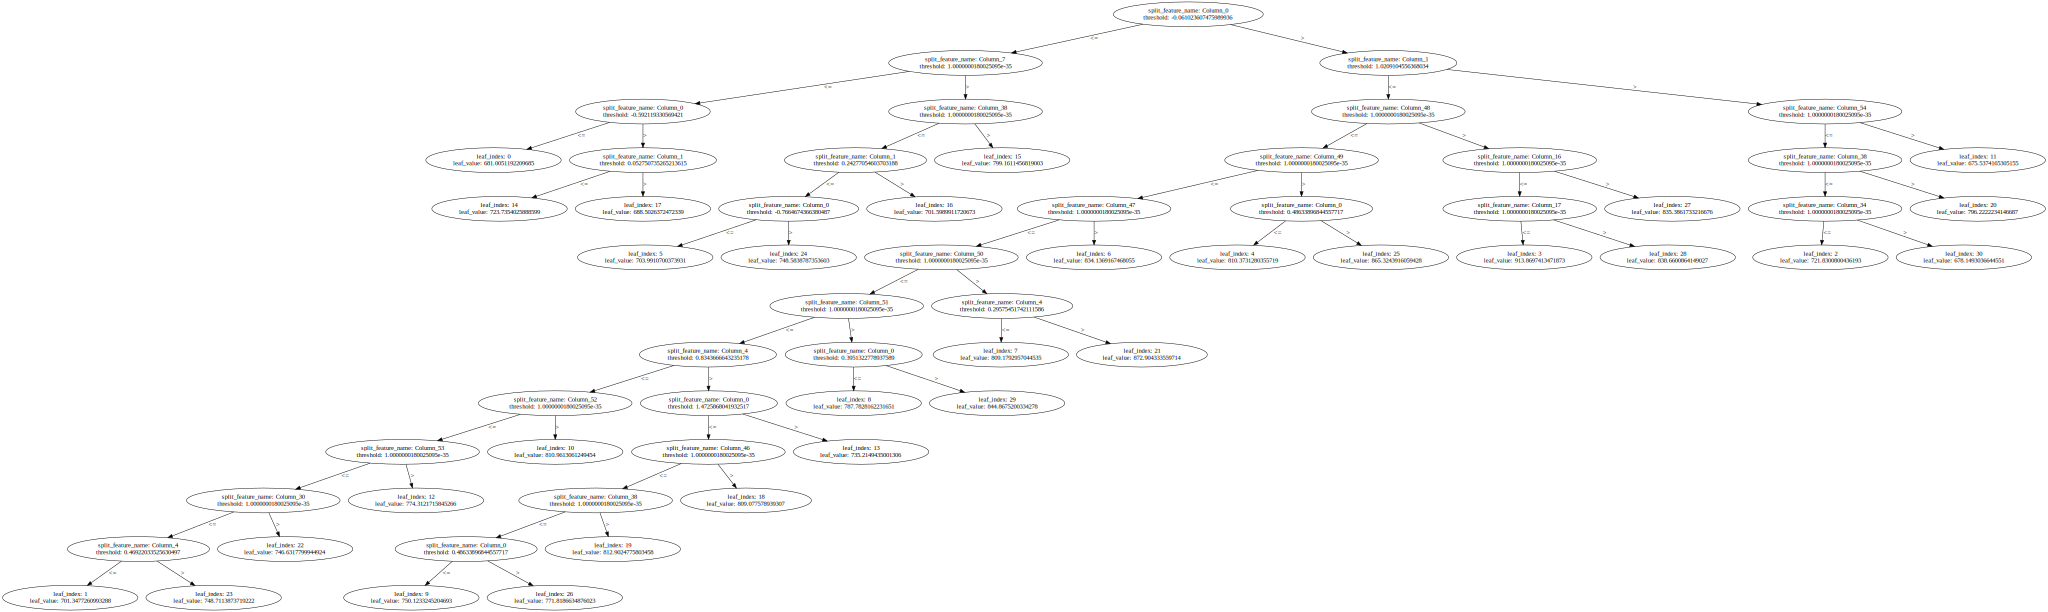

In [ ]:
create_tree_digraph(gbr)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.019054,4.206544,0.014751,0.001861,1,{'n_features_to_select': 1},0.313793,0.330640,0.314537,0.295964,...,0.310230,0.013021,13,0.370097,0.365288,0.370286,0.372300,0.372997,0.370194,0.002697
1,9.380493,0.073961,0.013302,0.000448,2,{'n_features_to_select': 2},0.513338,0.501643,0.500842,0.482149,...,0.471839,0.056204,12,0.611056,0.616727,0.610589,0.614384,0.506124,0.591776,0.042885
2,9.439418,0.087987,0.015991,0.001648,3,{'n_features_to_select': 3},0.621067,0.536777,0.607617,0.587192,...,0.568764,0.048226,11,0.734549,0.668939,0.735806,0.734592,0.677463,0.710270,0.030390
3,9.136265,0.063560,0.013498,0.000627,4,{'n_features_to_select': 4},0.618309,0.643426,0.610628,0.612448,...,0.616998,0.014452,10,0.764695,0.758480,0.767328,0.762937,0.765872,0.763863,0.003052
4,9.034500,0.140668,0.014603,0.001286,5,{'n_features_to_select': 5},0.654442,0.656977,0.657013,0.633011,...,0.645516,0.013230,9,0.792746,0.788931,0.789332,0.798909,0.790812,0.792146,0.003637
5,8.933810,0.051547,0.013886,0.000762,6,{'n_features_to_select': 6},0.668493,0.673657,0.665355,0.644821,...,0.659630,0.011984,8,0.803209,0.809281,0.803668,0.803970,0.805159,0.805057,0.002208
6,8.715684,0.031671,0.015224,0.001206,7,{'n_features_to_select': 7},0.694634,0.691448,0.691411,0.660308,...,0.681427,0.013905,7,0.821512,0.821195,0.820578,0.815440,0.815137,0.818772,0.002862
7,8.598388,0.066743,0.014164,0.000247,8,{'n_features_to_select': 8},0.708791,0.707152,0.717553,0.673029,...,0.703671,0.015726,6,0.826179,0.825895,0.830248,0.831652,0.832919,0.829379,0.002858
8,8.405381,0.031662,0.014043,0.000216,9,{'n_features_to_select': 9},0.742804,0.732467,0.733402,0.697676,...,0.726650,0.015362,5,0.839550,0.836174,0.839060,0.848167,0.846487,0.841888,0.004619
9,8.343452,0.099451,0.014599,0.001543,10,{'n_features_to_select': 10},0.756774,0.780559,0.756613,0.711922,...,0.750465,0.022293,4,0.854977,0.849898,0.856450,0.853039,0.854961,0.853865,0.002260


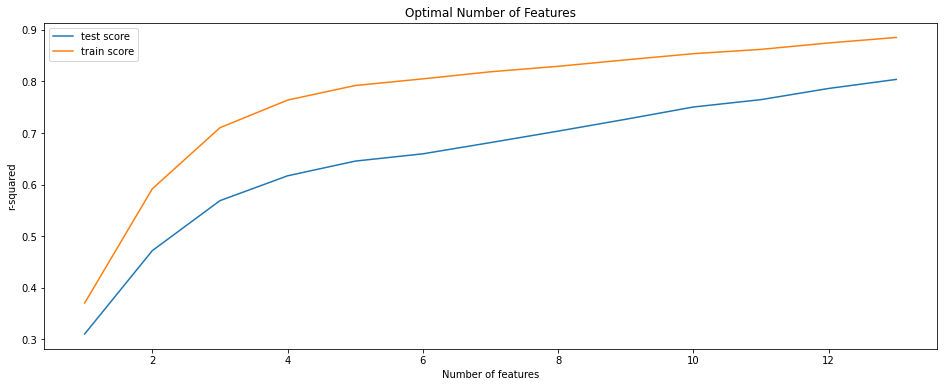

In [ ]:
# Plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel("Number of features")
plt.ylabel("r-squared")
plt.title("Optimal Number of Features")
plt.legend(["test score", "train score"], loc="upper left");

# Time series modeling

## Autoregression

In [ ]:
time_series_data = data["Rented Bike Count"].resample("H").ffill()

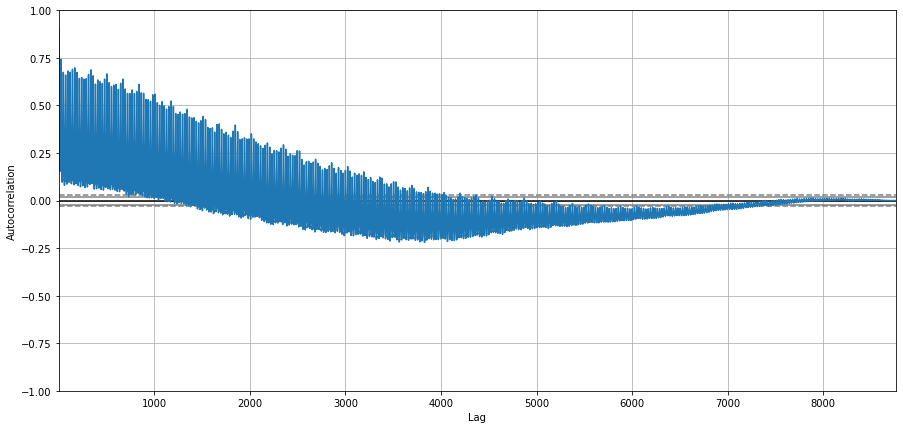

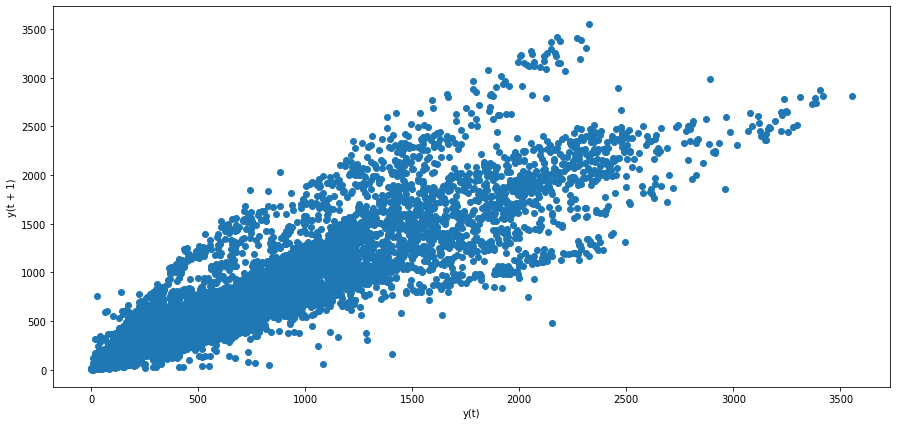

In [ ]:
plt.figure(figsize=(15,7))
pd.plotting.autocorrelation_plot(time_series_data) 
plt.show();
plt.figure(figsize=(15,7))
pd.plotting.lag_plot(time_series_data)
plt.show();

<ipython-input-85-9b13ad31186b>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  rented_bike_count_add = seasonal_decompose(time_series_data, model="additive", freq = 720) # monthly


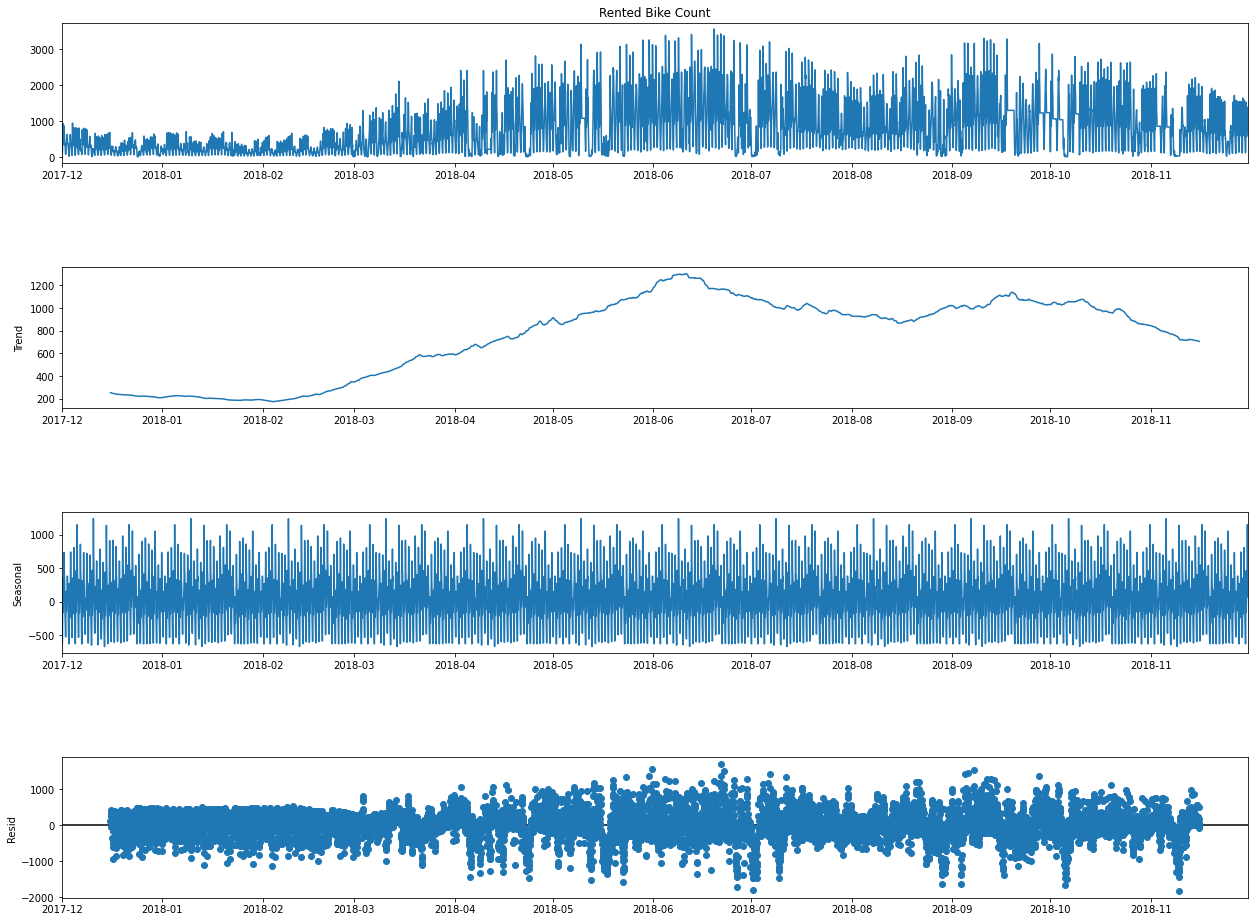

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive model
rented_bike_count_add = seasonal_decompose(time_series_data, model="additive", freq = 720) # monthly
fig = rented_bike_count_add.plot()
fig.set_size_inches(20, 15)

# We cannot apply the multiplicative model since some values are 0
# Multiplicative model
# rented_bike_count_mlt = seasonal_decompose(data["Rented Bike Count"], model="multiplicative", freq = 720) # monthly
# rented_bike_count_mlt.plot()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(time_series_data, lags=1).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:      Rented Bike Count   No. Observations:                 8760
Model:                     AutoReg(1)   Log Likelihood              -61570.010
Method:               Conditional MLE   S.D. of innovations            273.255
Date:                Tue, 13 Dec 2022   AIC                             11.221
Time:                        19:03:55   BIC                             11.224
Sample:                    12-01-2017   HQIC                            11.222
                         - 11-30-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               71.1749      4.460     15.958      0.000      62.433      79.916
Rented Bike Count.L1     0.9033      0.005    197.084      0.000       0.894       0.912
            

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


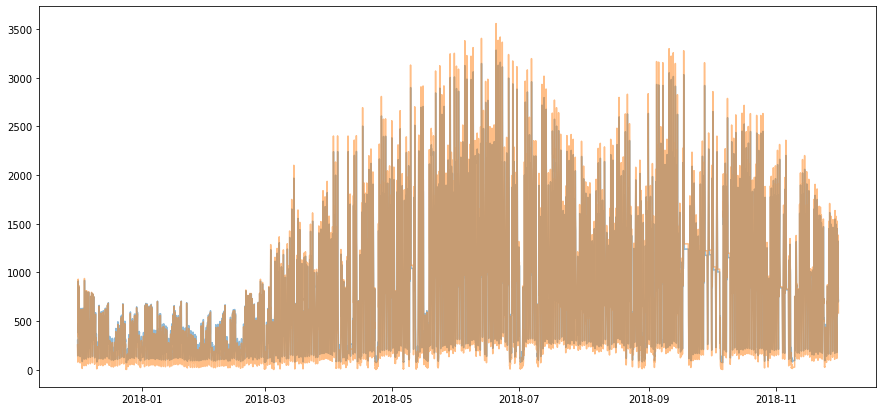

In [ ]:
pred = ar_model.predict(dynamic=False)

plt.figure(figsize=(15,7))
plt.plot(pred, alpha=0.5)
plt.plot(time_series_data, alpha=0.5);

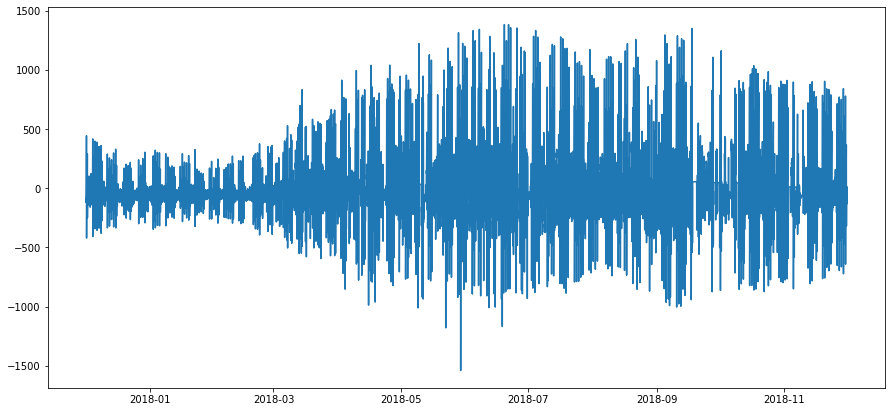

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(time_series_data - pred);

## Moving average

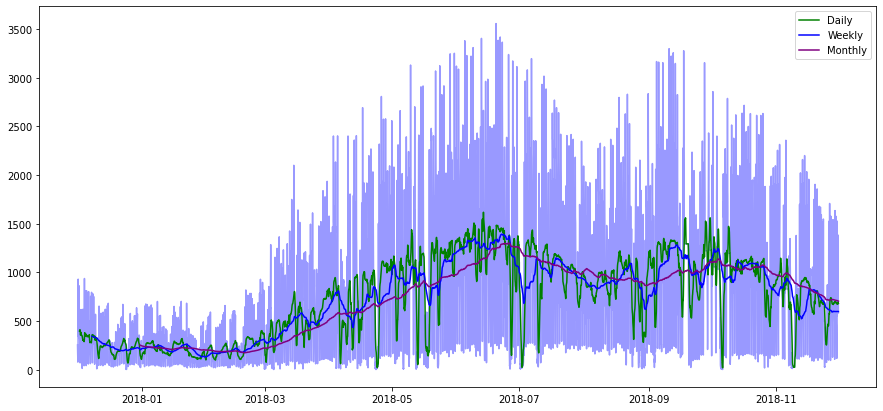

In [ ]:
# Calculate simple rolling average - daily, weekly, monthly 
# [Caroline]
daily_avg = time_series_data.rolling(window = 24)
weekly_avg = time_series_data.rolling(window = 24*7)
monthly_avg = time_series_data.rolling(window = 24*30)

data_movingavg = pd.concat([daily_avg.mean(), weekly_avg.mean(), monthly_avg.mean()], axis=1)
data_movingavg.columns = ["daily_avg", "weekly_avg", "monthly_avg"]

# Plot the moving averages over original bike counts
plt.figure(figsize=(15, 7))
plt.plot(time_series_data.index, time_series_data, color = 'blue', alpha = 0.4)
plt.plot(data_movingavg.index, data_movingavg["daily_avg"], color = 'green', label = "Daily")
plt.plot(data_movingavg.index, data_movingavg["weekly_avg"], color = 'blue', label = "Weekly")
plt.plot(data_movingavg.index, data_movingavg["monthly_avg"], color = 'purple', label = "Monthly")

plt.legend();


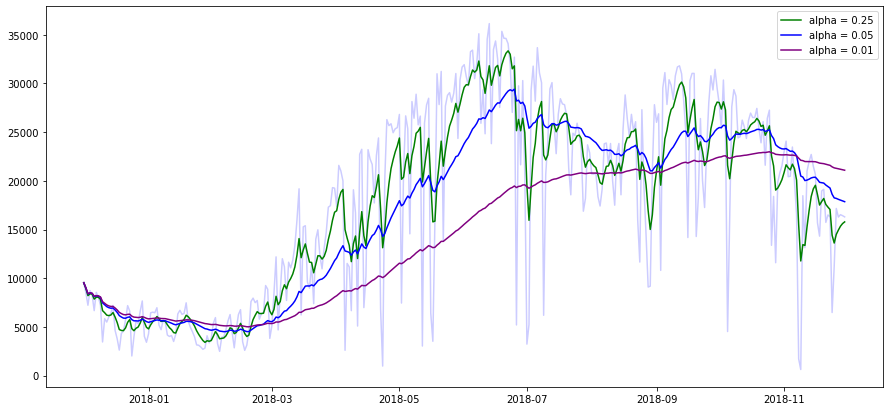

In [ ]:
# Calculate the exponential rolling average, but on a summary of daily countsto remove the hourly noise. 
# [Caroline]
time_series_data_byday = time_series_data.resample("D").sum()

avg_ewm_25 = time_series_data_byday.ewm(alpha = 0.25, adjust = True).mean()
avg_ewm_5 = time_series_data_byday.ewm(alpha = 0.05, adjust = True).mean()
avg_ewm_1 = time_series_data_byday.ewm(alpha = 0.01, adjust = True).mean()

data_movingavg_ewm = pd.concat([avg_ewm_25, avg_ewm_5, avg_ewm_1], axis=1)
data_movingavg_ewm.columns = ["avg_ewm_25", "avg_ewm_5", "avg_ewm_1"]

# Plot the moving averages over original bike counts
plt.figure(figsize=(15, 7))
plt.plot(time_series_data_byday.index, time_series_data_byday, color = 'blue', alpha = 0.2)
plt.plot(data_movingavg_ewm.index, data_movingavg_ewm["avg_ewm_25"], color = 'green', label = "alpha = 0.25")
plt.plot(data_movingavg_ewm.index, data_movingavg_ewm["avg_ewm_5"], color = 'blue', label = "alpha = 0.05")
plt.plot(data_movingavg_ewm.index, data_movingavg_ewm["avg_ewm_1"], color = 'purple', label = "alpha = 0.01")

plt.legend();


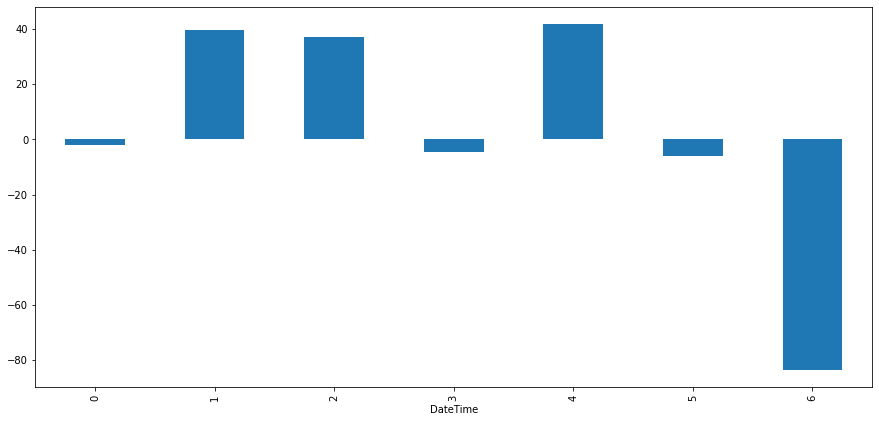

In [ ]:
# Look at whether the number of rentals are higher or lower than the weekly average on certain weekdays or certain hours of days
# [Caroline]

data_movingavg['weekly_diff'] = time_series_data - data_movingavg['weekly_avg']
data_movingavg.weekly_diff.groupby(data_movingavg.index.dayofweek).mean().plot.bar(figsize=(15, 7)); #0 = monday, 6 = sunday


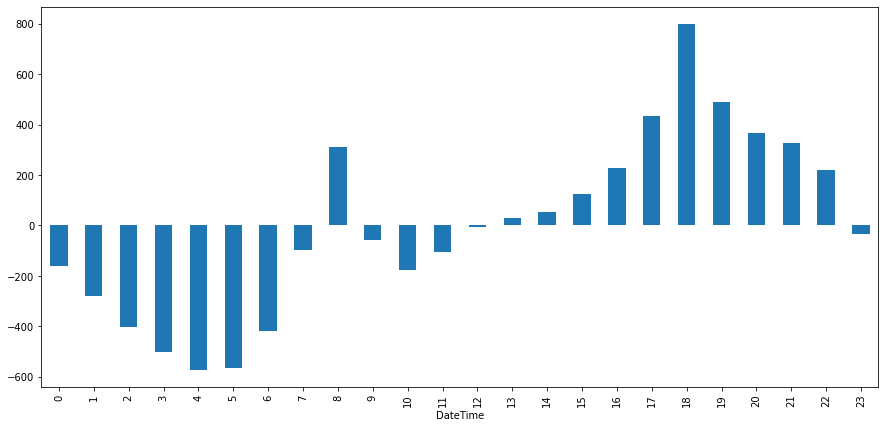

In [ ]:
# Repeat this with the daily averages to see if certain hours of the day are much more popular
data_movingavg['daily_diff'] = time_series_data - data_movingavg['daily_avg']
data_movingavg.daily_diff.groupby(data_movingavg.index.hour).mean().plot.bar(figsize=(15, 7));

From the analysis, it seems to be that the bikes are used heavily for commuting and through the evening, as the popularity spikes in the 8-9am hour and again around 6pm, with above average use all afternoon until 11pm. Also, the bikes are more heavily used on weekdays and usage drops off on Sundays, on average. 

## ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(time_series_data, order=(1, 1, 1))
res = arima_model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                 8760
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -61482.442
Date:                Tue, 13 Dec 2022   AIC                         122970.884
Time:                        19:03:58   BIC                         122992.118
Sample:                    12-01-2017   HQIC                        122978.119
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1490      0.039     -3.828      0.000      -0.225      -0.073
ma.L1          0.4145      0.043      9.657      0.000       0.330       0.499
sigma2      7.321e+04    634.902    115.314      0.0

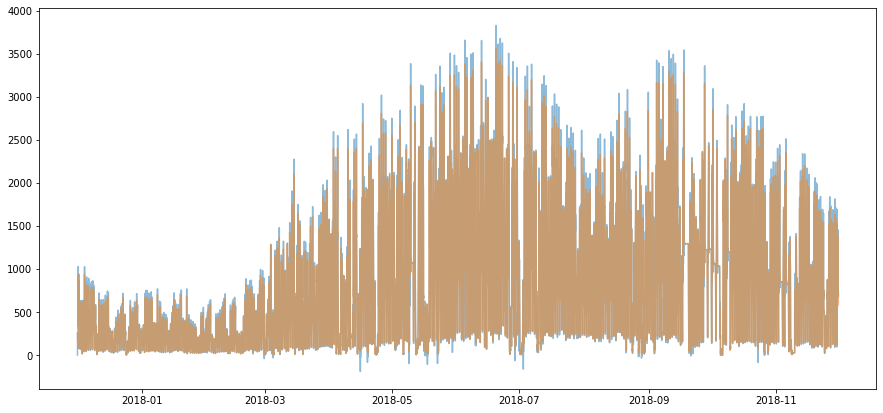

In [ ]:
pred = res.predict()

plt.figure(figsize=(15,7))
plt.plot(pred, alpha=0.5)
plt.plot(time_series_data, alpha=0.5);

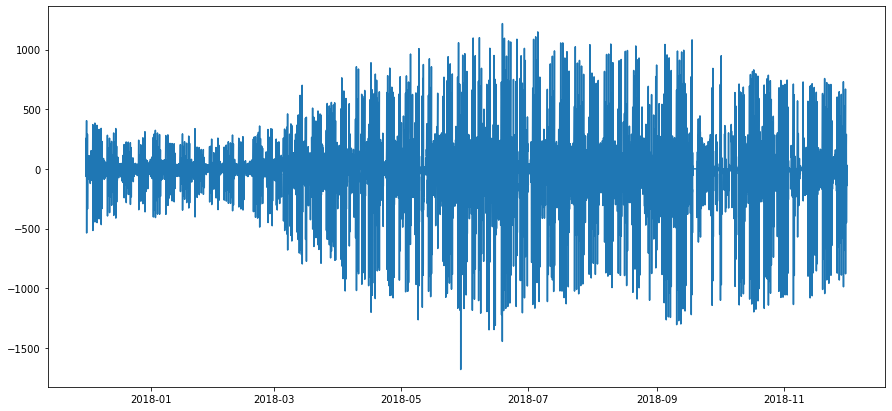

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(time_series_data - pred);

# Hypothesis testing

Can we confirm whether some weather related factors deter people from biking/result in lower bike rental usage?
- Rain
- Snow
- Cold Weather


In [ ]:
# Hypothesis testing
# Can we confirm if rain deters people from biking with 90% confidence?
# hypothesis - rain does not deter people from biking
# mean_rain = mean_overall
mean_overall = data["Rented Bike Count"].mean()
mean_rain = data[data.is_raining == 1]["Rented Bike Count"].mean()

se = data["Rented Bike Count"].count()/ np.sqrt(data[data.is_raining == 1]["Rented Bike Count"].count())
H0 = mean_overall
alpha = 0.1
Z_value = (mean_rain - H0) / se

# Find limits of alpha - 0.1
x_cr = stats.norm.ppf(alpha, loc = mean_rain, scale = se)

# Calculate p value
print('mean_overall', mean_overall)
print('mean_rain = ', mean_rain )
print('p value = ', stats.norm.cdf(mean_rain,H0,scale=se))
print ('se = ', se)
print('p value = ', stats.norm.cdf(Z_value))
print ('Z value =', Z_value)
print('x critical = ', x_cr)

# The P value is less than alpha, so the null hypothesis can be rejected. Rain does deter people from biking.

mean_overall 729.1569994093326
mean_rain =  167.2577519379845
p value =  0.06579726155749134
se =  372.65084610232026
p value =  0.06579726155749134
Z value = -1.5078437452871505
x critical =  -310.313523285964


In [ ]:
# Can we confirm if snow deters people from biking with 90% confidence?
# Hypothesis - snow does not deter people from biking
# mean_snow = mean_overall

mean_snow = data[data.is_snowing == 1]["Rented Bike Count"].mean()
se2 = data["Rented Bike Count"].count()/ np.sqrt(data[data.is_snowing == 1]["Rented Bike Count"].count())
Z_value2 = (mean_snow - H0) / se2

# Find limits of alpha - 0.1
x_cr2 = stats.norm.ppf(alpha, loc = mean_snow, scale = se2)

# Calculate p value
print('mean_overall', mean_overall)
print('mean_snow = ', mean_snow )
print('p value = ', stats.norm.cdf(mean_snow,H0,scale=se2))
print ('se = ', se2)
print('p value = ', stats.norm.cdf(Z_value2))
print ('Z value =', Z_value2)
print('x critical = ', x_cr2)

# The P value is less than alpha, so the null hypothesis can be rejected. Snow does deter people from biking.

mean_overall 729.1569994093326
mean_snow =  185.10158013544017
p value =  0.08806750733833285
se =  402.1842872402334
p value =  0.08806750733833285
Z value = -1.3527515532920766
x critical =  -330.3183228147202


In [ ]:
# Can we confirm if cold weather deters people from biking with 90% confidence?
# Assume cold weather means below average temp
# Hypothesis - cold does not deter people from biking
# mean_cold = mean_overall

mean_temp = data["Temperature(C)"].mean()
mean_cold = data[data["Temperature(C)"] < mean_temp]["Rented Bike Count"].mean()
se3 = data["Rented Bike Count"].count()/ np.sqrt(data[data["Temperature(C)"] < mean_temp]["Rented Bike Count"].count())
Z_value3 = (mean_snow - H0) / se3

# Find limits of alpha - 0.1
x_cr3 = stats.norm.ppf(alpha, loc = mean_cold, scale = se3)

# Calculate p value
print('mean_overall', mean_overall)
print('mean_cold = ', mean_cold )
print('p value = ', stats.norm.cdf(mean_cold,H0,scale=se3))
print ('se = ', se3)
print('p value = ', stats.norm.cdf(Z_value3))
print ('Z value =', Z_value3)
print('x critical = ', x_cr3)

# The P value is less than alpha, so the null hypothesis can be rejected. Cold does deter people from biking.


mean_overall 729.1569994093326
mean_cold =  383.61432038834954
p value =  0.004394773635433443
se =  131.87982264682958
p value =  1.8505524436693782e-05
Z value = -4.125387859603492
x critical =  214.60352721156084


Conclusion - we can confirm with 90% confidence that snow, rain and cold temperatures all result in lower bike rental usage. 